<div style="
    background: linear-gradient(135deg, #0D1117 0%, #161B22 50%, #1A1E2E 100%);
    padding: 60px 40px;
    border-radius: 20px;
    border: 2px solid #00C9A7;
    text-align: center;
    font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
    margin-bottom: 30px;
    box-shadow: 0 0 40px rgba(0, 201, 167, 0.15);
">
    <div style="font-size: 50px; margin-bottom: 10px;">🚗</div>
    <h1 style="
        color: #00C9A7;
        font-size: 38px;
        margin: 0;
        letter-spacing: 2px;
        text-shadow: 0 0 20px rgba(0,201,167,0.3);
    ">Chicago Residential Parking Permit Zones</h1>
    <h2 style="
        color: #C9D1D9;
        font-weight: 300;
        font-size: 20px;
        margin-top: 10px;
    ">Exploratory Data Analysis & The Four Pillars of Analytics</h2>
    <p style="color: #8B949E; font-size: 14px; margin-top: 5px;">2015 – 2026 | Street Segment-Level Designations | Standard & Buffer</p>
    <hr style="border: 1px solid #00C9A740; margin: 30px 80px;">
    <p style="color: #C9D1D9; font-size: 16px; margin: 0;">
        <strong style="color:#00C9A7;">Author:</strong> HAMMAD ZAHID
    </p>
    <p style="color: #8B949E; font-size: 13px; margin-top: 8px;">
        Data Analyst · Urban Data Enthusiast · Visualization Designer
    </p>
    <div style="margin-top: 20px;">
        <a href="https://www.linkedin.com/in/hammad-zahid-xyz" style="color:#00C9A7; text-decoration:none; margin: 0 10px;">🔗 LinkedIn</a>
        <a href="https://github.com/Hamad-Ansari" style="color:#00C9A7; text-decoration:none; margin: 0 10px;">🐙 GitHub</a>
        <a href="https://twitter.com/YOUR_LINK" style="color:#00C9A7; text-decoration:none; margin: 0 10px;">🐦 Twitter</a>
        <a href="mrhammadzahid24@gmail.com" style="color:#00C9A7; text-decoration:none; margin: 0 10px;">📧 Email</a>
    </div>
</div>

<div style="
    background-color: #0D1117;
    border-left: 5px solid #00C9A7;
    padding: 25px 30px;
    border-radius: 10px;
    font-family: 'Segoe UI', sans-serif;
    margin-bottom: 25px;
">
<h2 style="color:#00C9A7; margin-top:0;">📑 Table of Contents</h2>
<ol style="color:#C9D1D9; font-size:15px; line-height: 2.2;">
    <li><a href="#setup" style="color:#58A6FF; text-decoration:none;">⚙️ Environment Setup & Theme Configuration</a></li>
    <li><a href="#load" style="color:#58A6FF; text-decoration:none;">📂 Data Loading & First Impressions</a></li>
    <li><a href="#cleaning" style="color:#58A6FF; text-decoration:none;">🧹 Data Cleaning & Quality Audit</a></li>
    <li><a href="#pillar1" style="color:#58A6FF; text-decoration:none;">📊 Pillar 1 — Descriptive Analytics (What Happened?)</a></li>
    <li><a href="#pillar2" style="color:#58A6FF; text-decoration:none;">🔍 Pillar 2 — Diagnostic Analytics (Why Did It Happen?)</a></li>
    <li><a href="#pillar3" style="color:#58A6FF; text-decoration:none;">🔮 Pillar 3 — Predictive Analytics (What Will Happen?)</a></li>
    <li><a href="#pillar4" style="color:#58A6FF; text-decoration:none;">💡 Pillar 4 — Prescriptive Analytics (What Should We Do?)</a></li>
    <li><a href="#dashboard" style="color:#58A6FF; text-decoration:none;">📈 Executive Dashboard</a></li>
    <li><a href="#conclusion" style="color:#58A6FF; text-decoration:none;">🏁 Conclusions & Key Takeaways</a></li>
    <li><a href="#author" style="color:#58A6FF; text-decoration:none;">👤 Author & Contact</a></li>
</ol>
</div>

<a id="setup"></a>
<div style="background:#0D1117; padding:15px 25px; border-radius:10px; border-left:5px solid #00C9A7; margin-bottom:15px;">
<h2 style="color:#00C9A7;">⚙️ 1. Environment Setup & Theme Configuration</h2>
<p style="color:#8B949E;">Installing dependencies, importing libraries, and setting up the unified visual theme used across every chart, dashboard, and highlight in this notebook.</p>
</div>

In [1]:
# ============================================================
# 1. IMPORTS & GLOBAL THEME CONFIGURATION
# ============================================================
import warnings, textwrap, itertools
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, silhouette_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

# ---------- UNIFIED COLOR PALETTE ----------
COLORS = {
    'bg_dark'    : '#0D1117',
    'bg_card'    : '#161B22',
    'accent'     : '#00C9A7',   # Teal / Mint
    'accent2'    : '#FF6F61',   # Coral
    'accent3'    : '#845EF7',   # Purple
    'accent4'    : '#FFC75F',   # Gold
    'accent5'    : '#58A6FF',   # Sky Blue
    'accent6'    : '#F778BA',   # Pink
    'text'       : '#C9D1D9',
    'text_muted' : '#8B949E',
    'grid'       : '#21262D',
}

PALETTE_SEQ  = [COLORS['accent'], COLORS['accent2'], COLORS['accent3'],
                COLORS['accent4'], COLORS['accent5'], COLORS['accent6']]

CMAP_MAIN = LinearSegmentedColormap.from_list(
    'chicago', ['#0D1117', '#00C9A7', '#FFC75F', '#FF6F61'], N=256)

# ---------- MATPLOTLIB RC PARAMS ----------
plt.rcParams.update({
    'figure.facecolor'   : COLORS['bg_dark'],
    'axes.facecolor'     : COLORS['bg_card'],
    'axes.edgecolor'     : COLORS['grid'],
    'axes.labelcolor'    : COLORS['text'],
    'axes.grid'          : True,
    'grid.color'         : COLORS['grid'],
    'grid.linestyle'     : '--',
    'grid.alpha'         : 0.5,
    'xtick.color'        : COLORS['text_muted'],
    'ytick.color'        : COLORS['text_muted'],
    'text.color'         : COLORS['text'],
    'font.family'        : 'DejaVu Sans',
    'font.size'          : 11,
    'legend.facecolor'   : COLORS['bg_card'],
    'legend.edgecolor'   : COLORS['grid'],
    'figure.dpi'         : 120,
    'savefig.dpi'        : 150,
    'savefig.bbox'       : 'tight',
})

sns.set_palette(PALETTE_SEQ)
print("✅  Environment ready  |  Theme: 'Chicago Midnight Teal'")

✅  Environment ready  |  Theme: 'Chicago Midnight Teal'


<a id="load"></a>
<div style="background:#0D1117; padding:15px 25px; border-radius:10px; border-left:5px solid #00C9A7; margin-bottom:15px;">
<h2 style="color:#00C9A7;">📂 2. Data Loading & First Impressions</h2>
<p style="color:#8B949E;">Loading the dataset directly from the Chicago Open Data Portal and performing an initial inspection.</p>
</div>

In [2]:
# ============================================================
# 2. DATA LOADING
# ============================================================
df = pd.read_csv('Parking_Permit_Zones.csv.csv')

# Normalise column names
df.columns = (df.columns
               .str.strip()
               .str.lower()
               .str.replace(' ', '_')
               .str.replace('-', '_')
               .str.replace('__', '_'))
df.head(3)

,row_id,status,zone,odd_even,address_range__low,address_range__high,street_direction,street_name,street_type,buffer,ward__low,ward__high
0,7485,ACTIVE,221,E,5900,5998,N,HARDING,AVE,N,55.0,57.0
1,7461,ACTIVE,382,E,4016,4046,S,KOMENSKY,AVE,N,67.0,88.0
2,7484,ACTIVE,221,O,5701,5799,N,HARDING,AVE,N,5.0,55.0


In [3]:
# Quick shape, dtypes, memory
print("="*60)
print(f"  Shape : {df.shape}")
print(f"  Memory: {df.memory_usage(deep=True).sum()/1024:.1f} KB")
print("="*60)
df.info()

  Shape : (10369, 12)
  Memory: 3650.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10369 entries, 0 to 10368
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   row_id               10369 non-null  int64  
 1   status               10369 non-null  object 
 2   zone                 10369 non-null  int64  
 3   odd_even             10369 non-null  object 
 4   address_range__low   10369 non-null  int64  
 5   address_range__high  10369 non-null  int64  
 6   street_direction     10369 non-null  object 
 7   street_name          10369 non-null  object 
 8   street_type          10306 non-null  object 
 9   buffer               10369 non-null  object 
 10  ward__low            10323 non-null  float64
 11  ward__high           10334 non-null  float64
dtypes: float64(2), int64(4), object(6)
memory usage: 972.2+ KB


In [4]:
# Rename columns to clean names for convenience
rename_map = {}
for c in df.columns:
    clean = (c.replace('address_range__low','addr_low')
              .replace('address_range__high','addr_high')
              .replace('ward__low','ward_low')
              .replace('ward__high','ward_high'))
    rename_map[c] = clean
df.rename(columns=rename_map, inplace=True)

# If columns still have original names, do a manual pass
col_map_fallback = {
    'address_range___low'  : 'addr_low',
    'address_range___high' : 'addr_high',
    'ward___low'           : 'ward_low',
    'ward___high'          : 'ward_high',
}
df.rename(columns=col_map_fallback, inplace=True)

print("📋 Final column names:")
for i, c in enumerate(df.columns):
    print(f"   {i:>2}. {c}")

📋 Final column names:
    0. row_id
    1. status
    2. zone
    3. odd_even
    4. addr_low
    5. addr_high
    6. street_direction
    7. street_name
    8. street_type
    9. buffer
   10. ward_low
   11. ward_high


<a id="cleaning"></a>
<div style="background:#0D1117; padding:15px 25px; border-radius:10px; border-left:5px solid #00C9A7; margin-bottom:15px;">
<h2 style="color:#00C9A7;">🧹 3. Data Cleaning & Quality Audit</h2>
<p style="color:#8B949E;">Identifying missing values, duplicates, outliers, and data type corrections before deep analysis.</p>
</div>

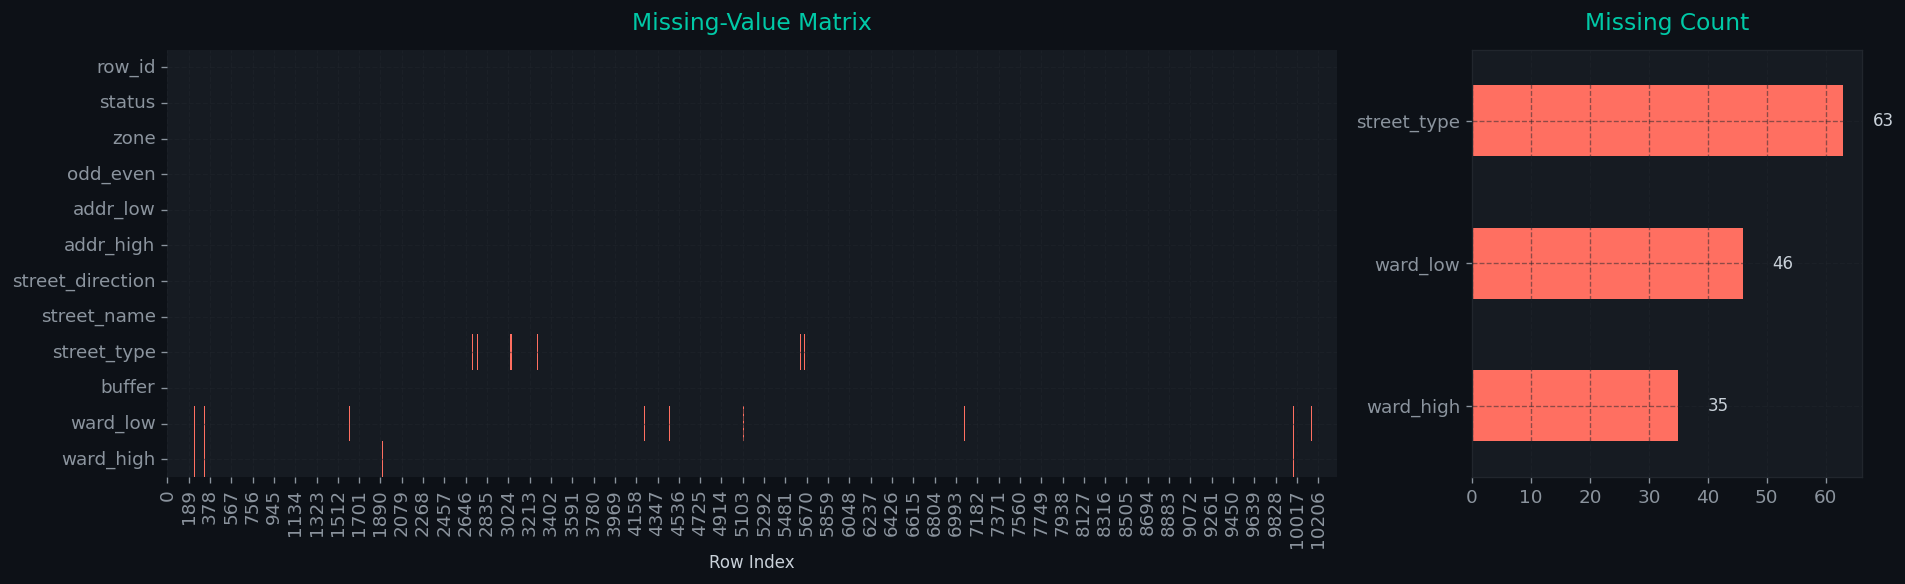

In [5]:
# ============================================================
# 3. DATA CLEANING & QUALITY AUDIT
# ============================================================

# 3-A  Missing values heatmap
fig, axes = plt.subplots(1, 2, figsize=(16, 5),
                         gridspec_kw={'width_ratios': [3, 1]})

# Left – heatmap
sns.heatmap(df.isnull().T, cbar=False, cmap=['#161B22', '#FF6F61'],
            yticklabels=df.columns, ax=axes[0])
axes[0].set_title('Missing-Value Matrix', fontsize=14, color=COLORS['accent'], pad=12)
axes[0].set_xlabel('Row Index', fontsize=10)

# Right – bar
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values()
if len(missing) == 0:
    axes[1].text(0.5, 0.5, 'No Missing\nValues ✅', ha='center', va='center',
                 fontsize=16, color=COLORS['accent'], transform=axes[1].transAxes)
    axes[1].set_axis_off()
else:
    missing.plot.barh(ax=axes[1], color=COLORS['accent2'])
    axes[1].set_title('Missing Count', fontsize=14, color=COLORS['accent'], pad=12)
    for i, v in enumerate(missing):
        axes[1].text(v + 5, i, f'{v}', va='center', fontsize=10, color=COLORS['text'])
plt.tight_layout()
plt.show()

In [6]:
# 3-B  Fill / Drop strategy
# Ward columns: fill NaN with 0 (means segment hasn't been assigned)
for col in df.columns:
    if 'ward' in col:
        df[col] = df[col].fillna(0).astype(int)

# street_type: fill with 'UNKNOWN'
if 'street_type' in df.columns:
    df['street_type'] = df['street_type'].fillna('UNKNOWN')

# Duplicates
dup_count = df.duplicated().sum()
print(f"🔁 Duplicate rows: {dup_count}")
if dup_count:
    df.drop_duplicates(inplace=True)
    print(f"   ➜ Removed. New shape: {df.shape}")

# Buffer → binary
if 'buffer' in df.columns:
    df['is_buffer'] = df['buffer'].str.upper().map(
        lambda x: 1 if x == 'Y' or x == 'TRUE' or x == 'BUFFER' else 0)
else:
    df['is_buffer'] = 0

# Address span feature
for c in df.columns:
    if 'addr_low' in c or 'address' in c and 'low' in c:
        low_col = c
    if 'addr_high' in c or 'address' in c and 'high' in c:
        high_col = c

try:
    df['addr_span'] = df[high_col] - df[low_col]
except:
    # fallback: find numeric columns with low/high
    num_cols = df.select_dtypes(include='number').columns.tolist()
    if len(num_cols) >= 4:
        df['addr_span'] = df[num_cols[3]] - df[num_cols[2]]
    else:
        df['addr_span'] = 0

print(f"\n✅  Cleaning complete  |  Final shape: {df.shape}")
df.describe(include='all').T

🔁 Duplicate rows: 0

✅  Cleaning complete  |  Final shape: (10369, 14)


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
row_id,10369.0,NaN,NaN,NaN,5758.447102,3777.773074,1.0,2663.0,5331.0,8039.0,14714.0
status,10369,2,ACTIVE,9875,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zone,10369.0,NaN,NaN,NaN,730.454914,763.130107,1.0,114.0,383.0,1331.0,5050.0
odd_even,10369,2,O,5186,NaN,NaN,NaN,NaN,NaN,NaN,NaN
addr_low,10369.0,NaN,NaN,NaN,3471.112547,2418.485505,0.0,1601.0,2915.0,5001.0,13101.0
addr_high,10369.0,NaN,NaN,NaN,3541.672292,2489.217559,0.0,1656.0,2999.0,5058.0,64533.0
street_direction,10369,4,W,3867,NaN,NaN,NaN,NaN,NaN,NaN,NaN
street_name,10369,771,SPRINGFIELD,98,NaN,NaN,NaN,NaN,NaN,NaN,NaN
street_type,10369,12,AVE,5900,NaN,NaN,NaN,NaN,NaN,NaN,NaN
buffer,10369,2,N,8966,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<a id="pillar1"></a>
<div style="
    background: linear-gradient(90deg, #0D1117, #161B22);
    padding: 25px 30px;
    border-radius: 14px;
    border: 1px solid #00C9A7;
    margin-bottom: 15px;
    box-shadow: 0 0 15px rgba(0,201,167,0.1);
">
<h1 style="color:#00C9A7; margin:0;">📊 Pillar 1 — Descriptive Analytics</h1>
<h3 style="color:#C9D1D9; font-weight:300; margin-top:5px;">"What Happened?"</h3>
<p style="color:#8B949E; margin-bottom:0;">
We quantify the current state of Chicago's residential parking zones — counts, distributions, geographic patterns, and structural composition.
</p>
</div>

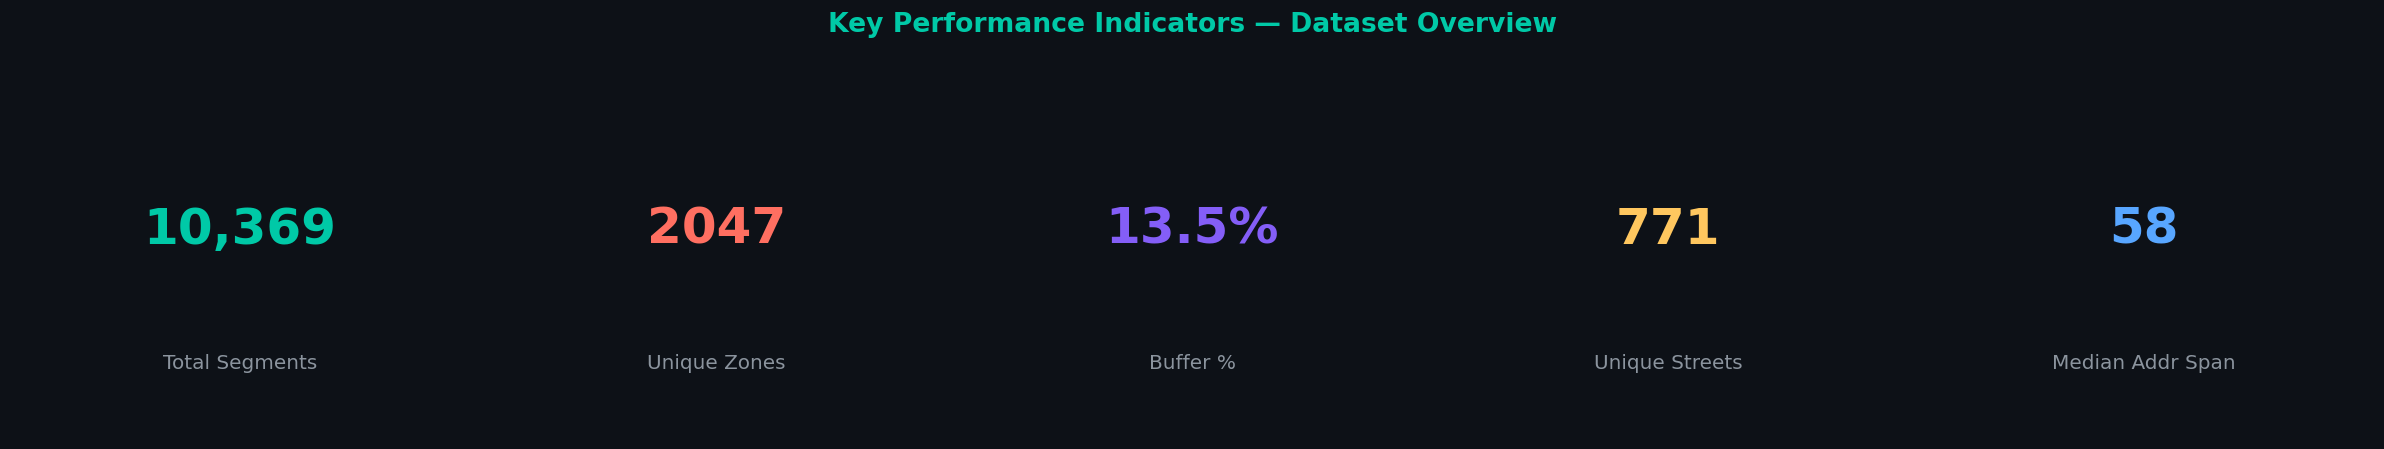

In [7]:
# ============================================================
# PILLAR 1 — DESCRIPTIVE ANALYTICS
# ============================================================

# ---------- 1A. KPI CARDS ----------
total_segments = len(df)
total_zones    = df['zone'].nunique()
buffer_pct     = df['is_buffer'].mean() * 100
streets_unique = df['street_name'].nunique() if 'street_name' in df.columns else 0
median_span    = df['addr_span'].median()

fig, axes = plt.subplots(1, 5, figsize=(20, 3.5))
kpis = [
    ('Total Segments', f'{total_segments:,}', COLORS['accent']),
    ('Unique Zones', f'{total_zones}', COLORS['accent2']),
    ('Buffer %', f'{buffer_pct:.1f}%', COLORS['accent3']),
    ('Unique Streets', f'{streets_unique:,}', COLORS['accent4']),
    ('Median Addr Span', f'{median_span:,.0f}', COLORS['accent5']),
]

for ax, (label, val, clr) in zip(axes, kpis):
    ax.set_xlim(0, 1); ax.set_ylim(0, 1)
    ax.text(0.5, 0.62, val, ha='center', va='center',
            fontsize=30, fontweight='bold', color=clr)
    ax.text(0.5, 0.22, label, ha='center', va='center',
            fontsize=12, color=COLORS['text_muted'])
    ax.set_axis_off()
    # Card border
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_edgecolor(clr)
        spine.set_linewidth(1.5)
    ax.patch.set_facecolor(COLORS['bg_card'])
    ax.patch.set_alpha(1)

fig.patch.set_facecolor(COLORS['bg_dark'])
fig.suptitle('Key Performance Indicators — Dataset Overview',
             fontsize=16, color=COLORS['accent'], y=1.06, fontweight='bold')
plt.tight_layout()
plt.show()

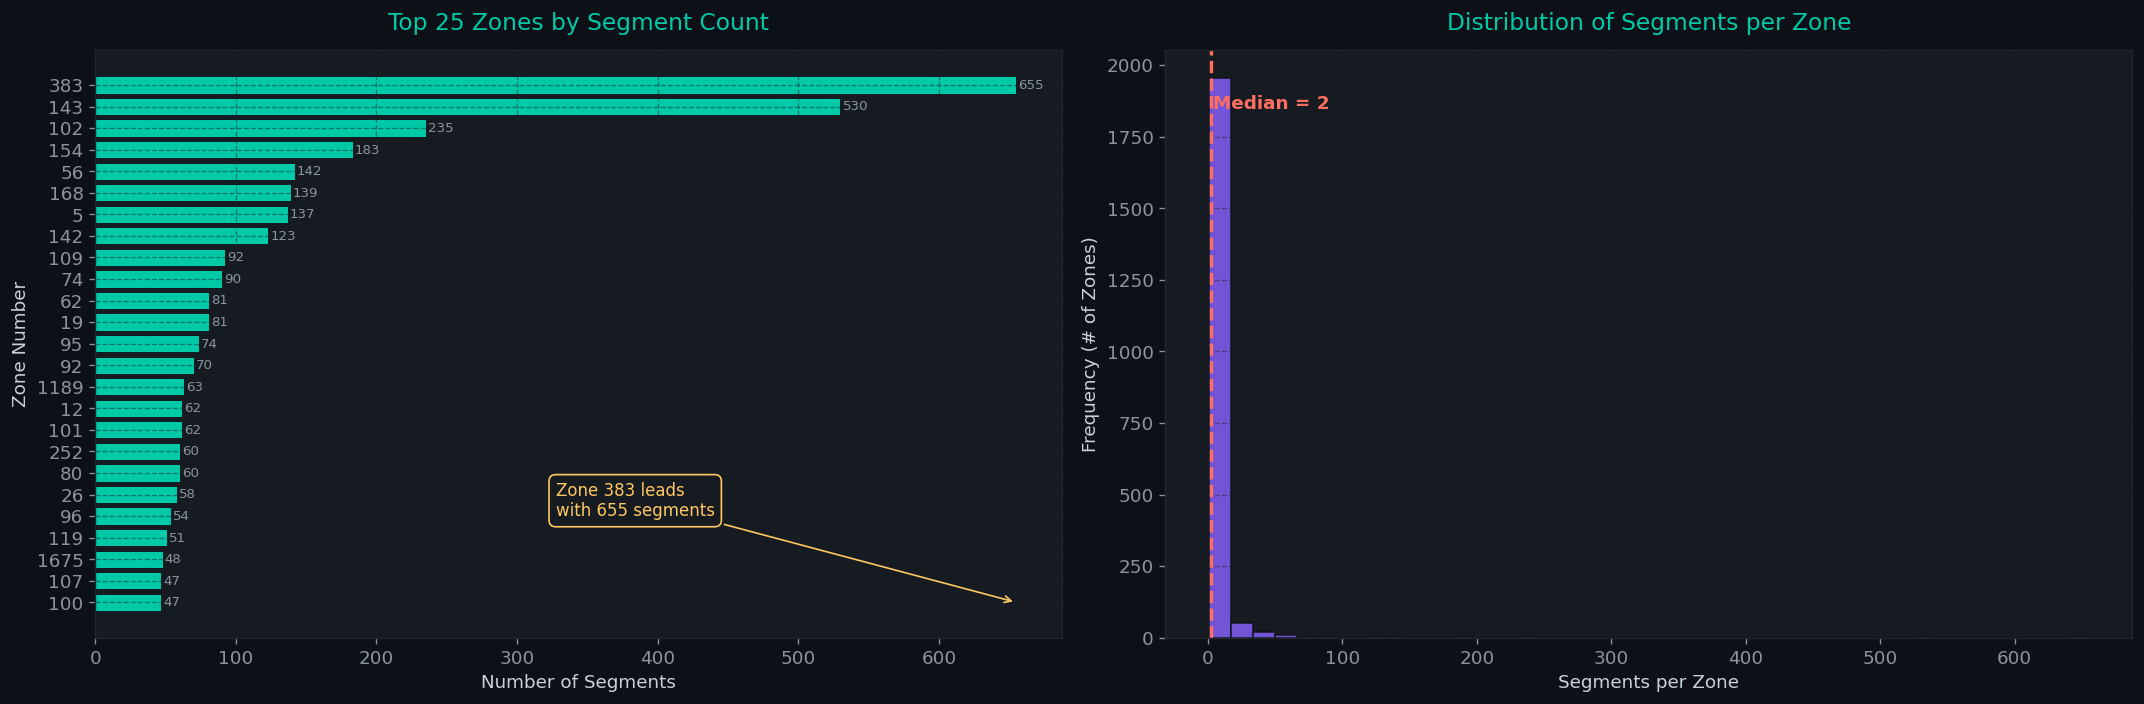

In [8]:
# ---------- 1B. Zone Frequency Distribution ----------
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Left: Top-25 zones by segment count
zone_counts = df['zone'].value_counts()
top25 = zone_counts.head(25)

bars = axes[0].barh(top25.index.astype(str)[::-1], top25.values[::-1],
                     color=COLORS['accent'], edgecolor=COLORS['bg_dark'], linewidth=0.5)
axes[0].set_title('Top 25 Zones by Segment Count', fontsize=14,
                   color=COLORS['accent'], pad=12)
axes[0].set_xlabel('Number of Segments')
axes[0].set_ylabel('Zone Number')
for bar in bars:
    w = bar.get_width()
    axes[0].text(w + 1.5, bar.get_y() + bar.get_height()/2,
                 f'{w:.0f}', va='center', fontsize=8, color=COLORS['text_muted'])

# Annotation: largest zone
axes[0].annotate(
    f'Zone {top25.index[0]} leads\nwith {top25.values[0]} segments',
    xy=(top25.values[0], 0), xytext=(top25.values[0]*0.5, 4),
    fontsize=10, color=COLORS['accent4'],
    arrowprops=dict(arrowstyle='->', color=COLORS['accent4']),
    bbox=dict(boxstyle='round,pad=0.4', fc=COLORS['bg_card'], ec=COLORS['accent4']))

# Right: Distribution histogram
axes[1].hist(zone_counts.values, bins=40, color=COLORS['accent3'],
             edgecolor=COLORS['bg_dark'], alpha=0.85)
axes[1].set_title('Distribution of Segments per Zone', fontsize=14,
                   color=COLORS['accent'], pad=12)
axes[1].set_xlabel('Segments per Zone')
axes[1].set_ylabel('Frequency (# of Zones)')
axes[1].axvline(zone_counts.median(), color=COLORS['accent2'], ls='--', lw=2)
axes[1].text(zone_counts.median()+2, axes[1].get_ylim()[1]*0.9,
             f'Median = {zone_counts.median():.0f}',
             fontsize=11, color=COLORS['accent2'], fontweight='bold')

plt.tight_layout()
plt.show()

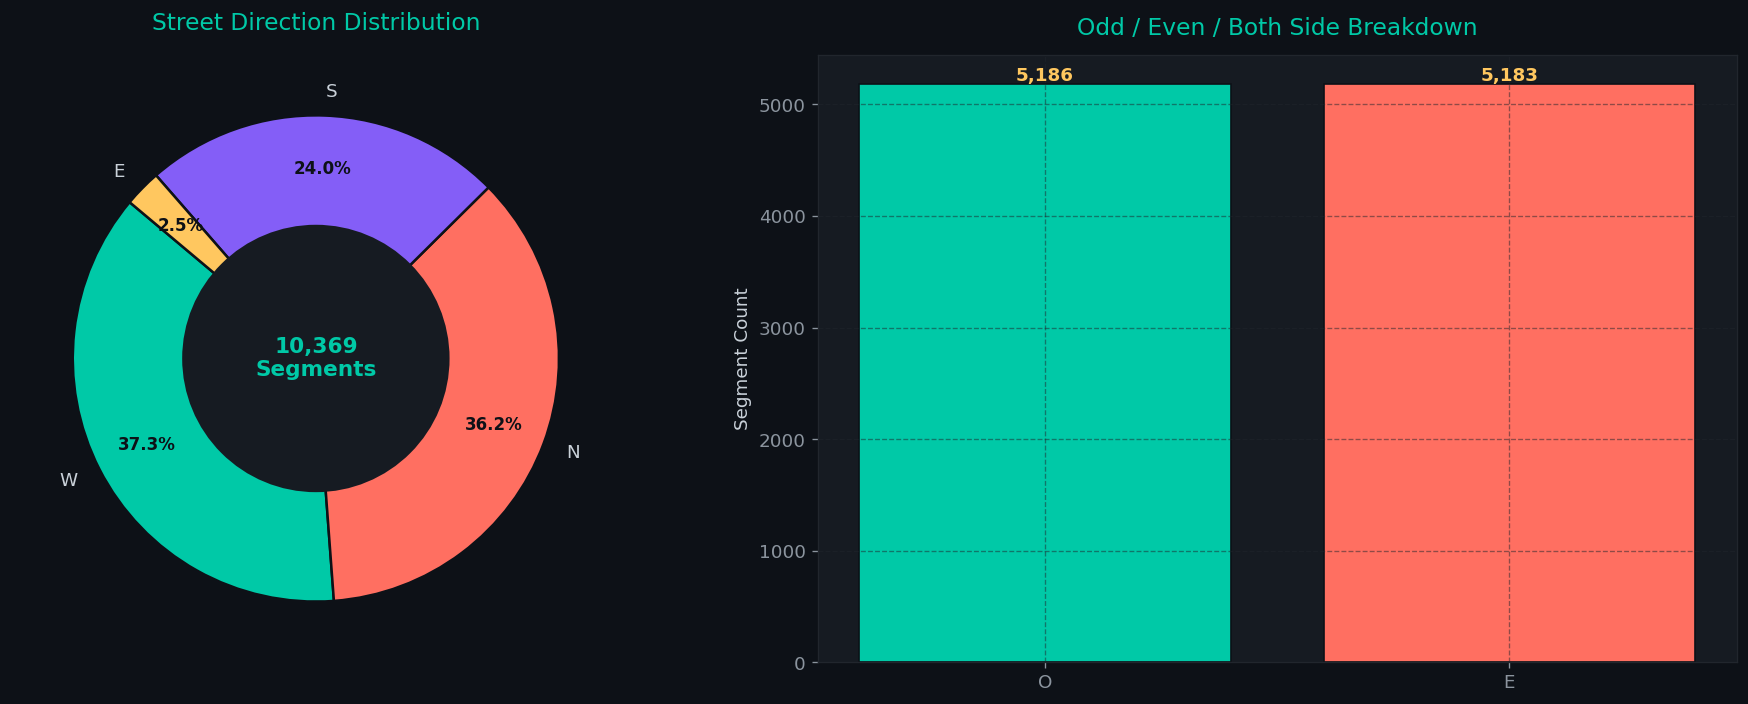

In [9]:
# ---------- 1C. Street Direction Breakdown ----------
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

if 'street_direction' in df.columns:
    dir_counts = df['street_direction'].value_counts()
    colors_pie = PALETTE_SEQ[:len(dir_counts)]

    wedges, texts, autotexts = axes[0].pie(
        dir_counts.values, labels=dir_counts.index,
        autopct='%1.1f%%', startangle=140,
        colors=colors_pie, textprops={'color': COLORS['text']},
        wedgeprops={'edgecolor': COLORS['bg_dark'], 'linewidth': 1.5},
        pctdistance=0.78)
    for t in autotexts:
        t.set_fontsize(10)
        t.set_color(COLORS['bg_dark'])
        t.set_fontweight('bold')
    axes[0].set_title('Street Direction Distribution', fontsize=14,
                       color=COLORS['accent'], pad=15)
    centre = plt.Circle((0, 0), 0.55, fc=COLORS['bg_card'])
    axes[0].add_artist(centre)
    axes[0].text(0, 0, f'{total_segments:,}\nSegments', ha='center',
                 va='center', fontsize=13, color=COLORS['accent'], fontweight='bold')

# Odd / Even / Both breakdown
if 'odd_even' in df.columns:
    oe = df['odd_even'].value_counts()
    axes[1].bar(oe.index, oe.values, color=[COLORS['accent'], COLORS['accent2'],
                COLORS['accent3']][:len(oe)],
                edgecolor=COLORS['bg_dark'], linewidth=1)
    axes[1].set_title('Odd / Even / Both Side Breakdown', fontsize=14,
                       color=COLORS['accent'], pad=12)
    axes[1].set_ylabel('Segment Count')
    for i, v in enumerate(oe.values):
        axes[1].text(i, v + 30, f'{v:,}', ha='center', fontsize=11,
                     color=COLORS['accent4'], fontweight='bold')

plt.tight_layout()
plt.show()

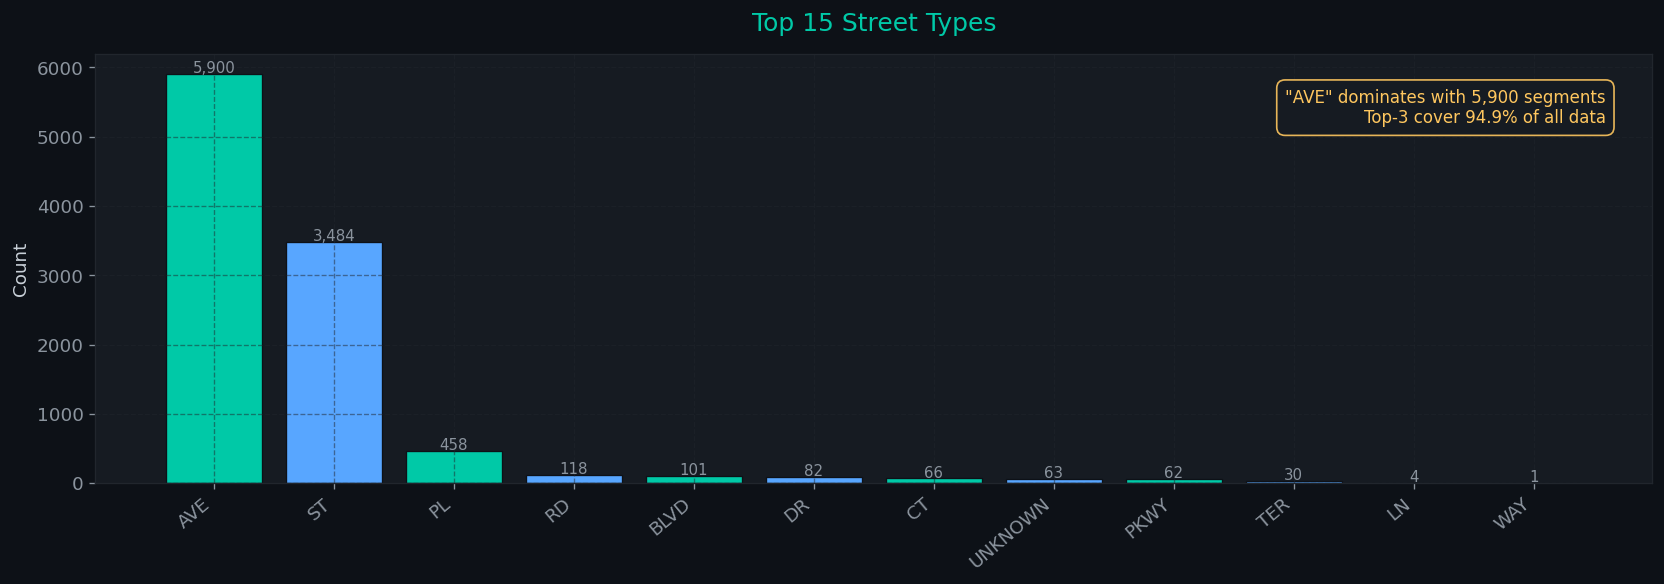

In [10]:
# ---------- 1D. Street Type Top-15 ----------
fig, ax = plt.subplots(figsize=(14, 5))

if 'street_type' in df.columns:
    st = df['street_type'].value_counts().head(15)
    gradient = [COLORS['accent'] if i % 2 == 0 else COLORS['accent5'] for i in range(len(st))]
    bars = ax.bar(st.index, st.values, color=gradient,
                  edgecolor=COLORS['bg_dark'], linewidth=0.8)
    ax.set_title('Top 15 Street Types', fontsize=15, color=COLORS['accent'], pad=14)
    ax.set_ylabel('Count')
    ax.set_xticklabels(st.index, rotation=40, ha='right')
    for bar in bars:
        h = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, h + 20,
                f'{h:,}', ha='center', fontsize=9, color=COLORS['text_muted'])

    # Insight box
    ax.text(0.97, 0.92,
            f'"{st.index[0]}" dominates with {st.values[0]:,} segments\n'
            f'Top-3 cover {st.values[:3].sum()/total_segments*100:.1f}% of all data',
            transform=ax.transAxes, ha='right', va='top', fontsize=10,
            color=COLORS['accent4'],
            bbox=dict(boxstyle='round,pad=0.5', fc=COLORS['bg_card'],
                      ec=COLORS['accent4'], alpha=0.9))

plt.tight_layout()
plt.show()

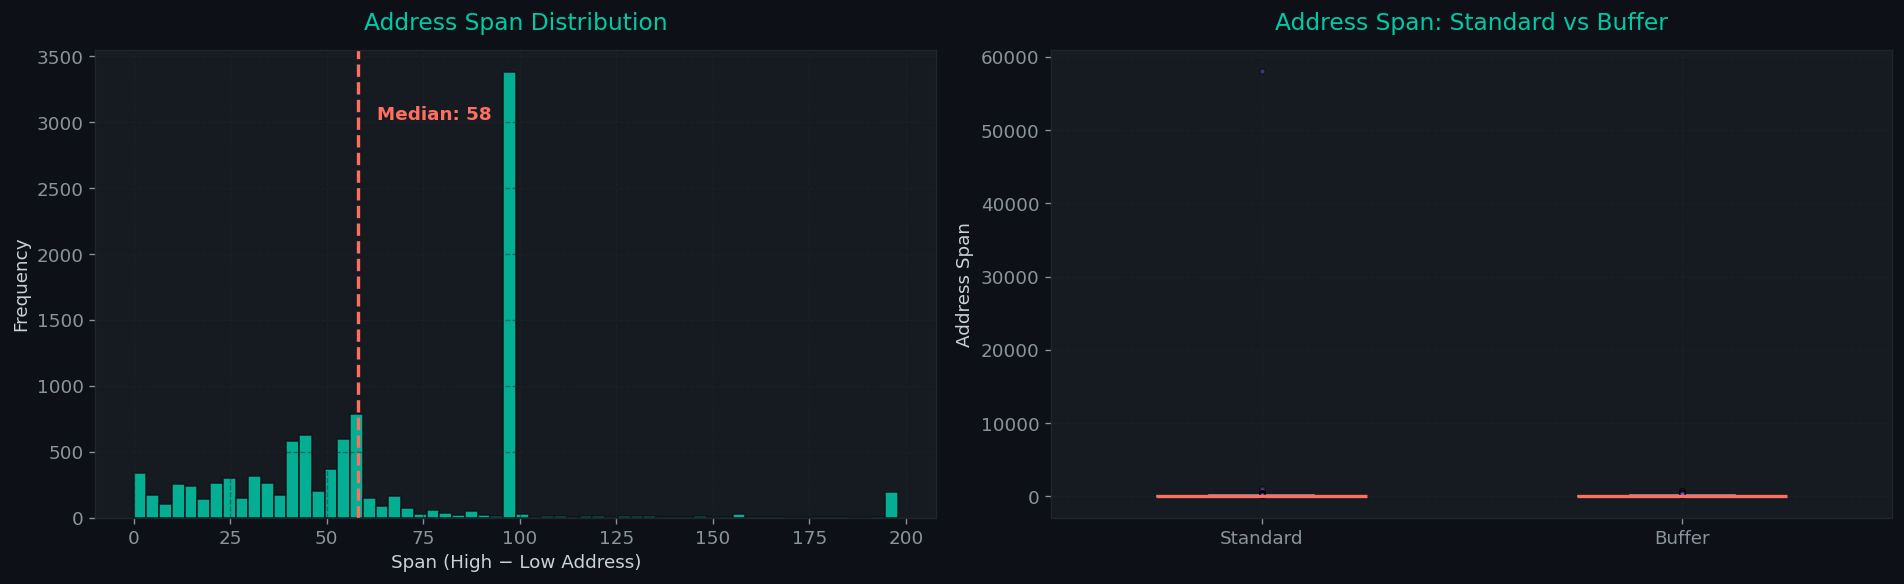

In [11]:
# ---------- 1E. Address Span Distribution ----------
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Histogram
axes[0].hist(df['addr_span'].clip(0, df['addr_span'].quantile(0.99)),
             bins=60, color=COLORS['accent'], edgecolor=COLORS['bg_dark'], alpha=0.85)
axes[0].set_title('Address Span Distribution', fontsize=14,
                   color=COLORS['accent'], pad=12)
axes[0].set_xlabel('Span (High − Low Address)')
axes[0].set_ylabel('Frequency')
axes[0].axvline(df['addr_span'].median(), color=COLORS['accent2'], ls='--', lw=2)
axes[0].text(df['addr_span'].median() + 5, axes[0].get_ylim()[1]*0.85,
             f'Median: {df["addr_span"].median():.0f}', fontsize=11,
             color=COLORS['accent2'], fontweight='bold')

# Box plot by buffer status
bp = axes[1].boxplot(
    [df.loc[df['is_buffer']==0, 'addr_span'].dropna(),
     df.loc[df['is_buffer']==1, 'addr_span'].dropna()],
    labels=['Standard', 'Buffer'], patch_artist=True, widths=0.5,
    boxprops=dict(facecolor=COLORS['accent']+'60', edgecolor=COLORS['accent']),
    medianprops=dict(color=COLORS['accent2'], linewidth=2),
    whiskerprops=dict(color=COLORS['text_muted']),
    capprops=dict(color=COLORS['text_muted']),
    flierprops=dict(marker='o', markerfacecolor=COLORS['accent3'], markersize=3, alpha=0.4))
axes[1].set_title('Address Span: Standard vs Buffer', fontsize=14,
                   color=COLORS['accent'], pad=12)
axes[1].set_ylabel('Address Span')

plt.tight_layout()
plt.show()

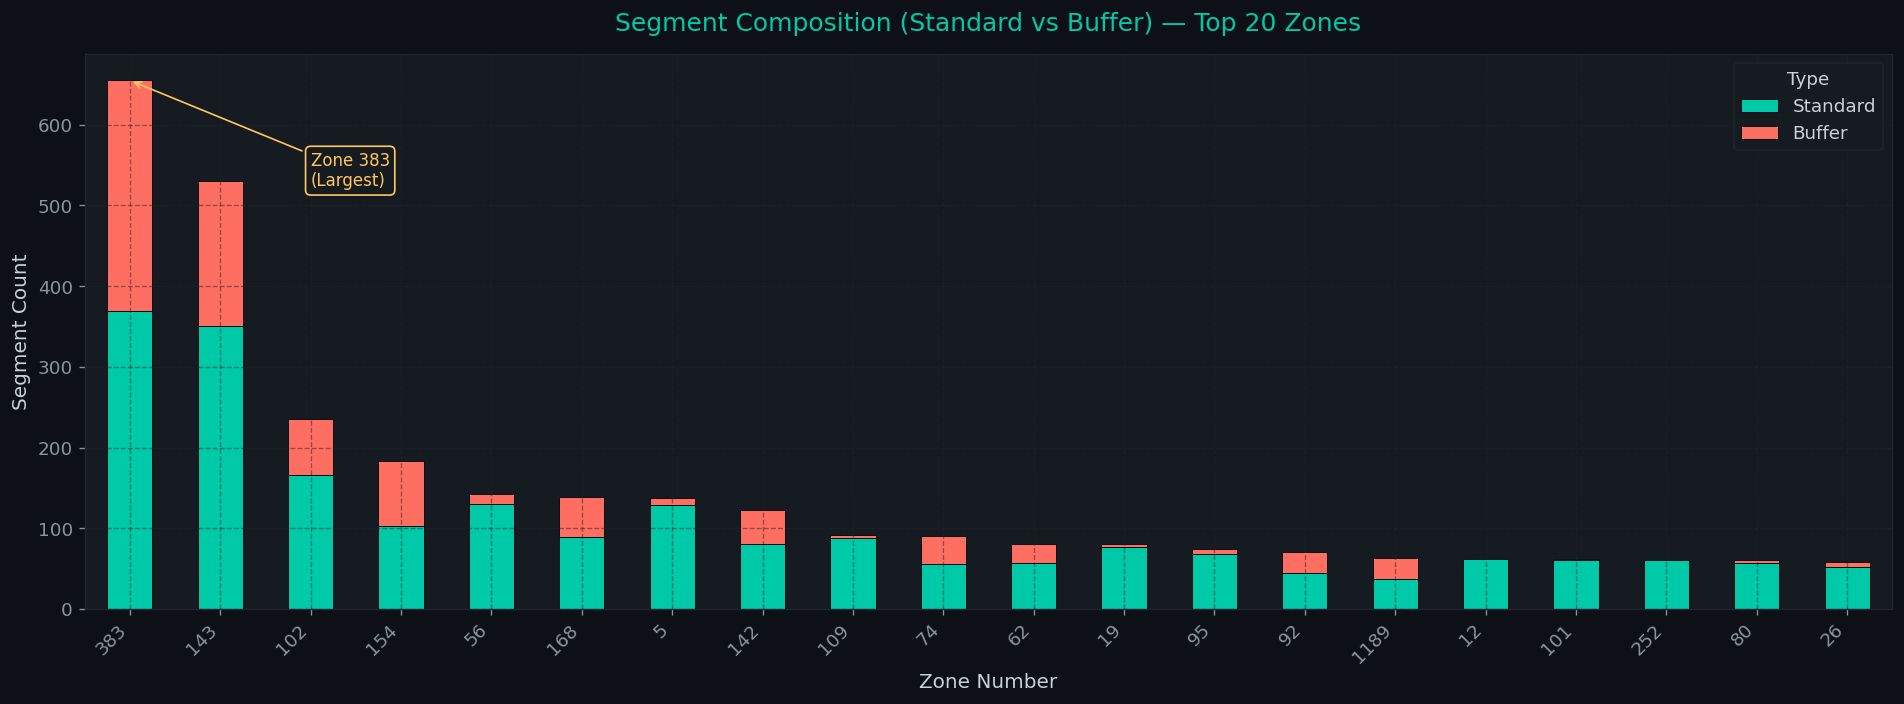

In [12]:
# ---------- 1F. Buffer vs Standard Composition per Top-20 Zones ----------
fig, ax = plt.subplots(figsize=(16, 6))

top20_zones = df['zone'].value_counts().head(20).index
df_top20 = df[df['zone'].isin(top20_zones)]
ct = pd.crosstab(df_top20['zone'], df_top20['is_buffer'])
ct.columns = ['Standard', 'Buffer']
ct = ct.loc[top20_zones]

ct.plot(kind='bar', stacked=True, ax=ax,
        color=[COLORS['accent'], COLORS['accent2']],
        edgecolor=COLORS['bg_dark'], linewidth=0.6)
ax.set_title('Segment Composition (Standard vs Buffer) — Top 20 Zones',
             fontsize=15, color=COLORS['accent'], pad=14)
ax.set_xlabel('Zone Number', fontsize=12)
ax.set_ylabel('Segment Count', fontsize=12)
ax.legend(title='Type', loc='upper right')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Annotation
max_zone = ct.sum(axis=1).idxmax()
ax.annotate(f'Zone {max_zone}\n(Largest)',
            xy=(ct.index.tolist().index(max_zone), ct.sum(axis=1).max()),
            xytext=(ct.index.tolist().index(max_zone)+2, ct.sum(axis=1).max()*0.8),
            fontsize=10, color=COLORS['accent4'],
            arrowprops=dict(arrowstyle='->', color=COLORS['accent4']),
            bbox=dict(boxstyle='round', fc=COLORS['bg_card'], ec=COLORS['accent4']))

plt.tight_layout()
plt.show()

<a id="pillar2"></a>
<div style="
    background: linear-gradient(90deg, #0D1117, #161B22);
    padding: 25px 30px;
    border-radius: 14px;
    border: 1px solid #FF6F61;
    margin-bottom: 15px;
    box-shadow: 0 0 15px rgba(255,111,97,0.1);
">
<h1 style="color:#FF6F61; margin:0;">🔍 Pillar 2 — Diagnostic Analytics</h1>
<h3 style="color:#C9D1D9; font-weight:300; margin-top:5px;">"Why Did It Happen?"</h3>
<p style="color:#8B949E; margin-bottom:0;">
We drill into correlations, cross-tabulations, and statistical tests to understand <strong>why</strong> zones differ in size, composition, and address span.
</p>
</div>

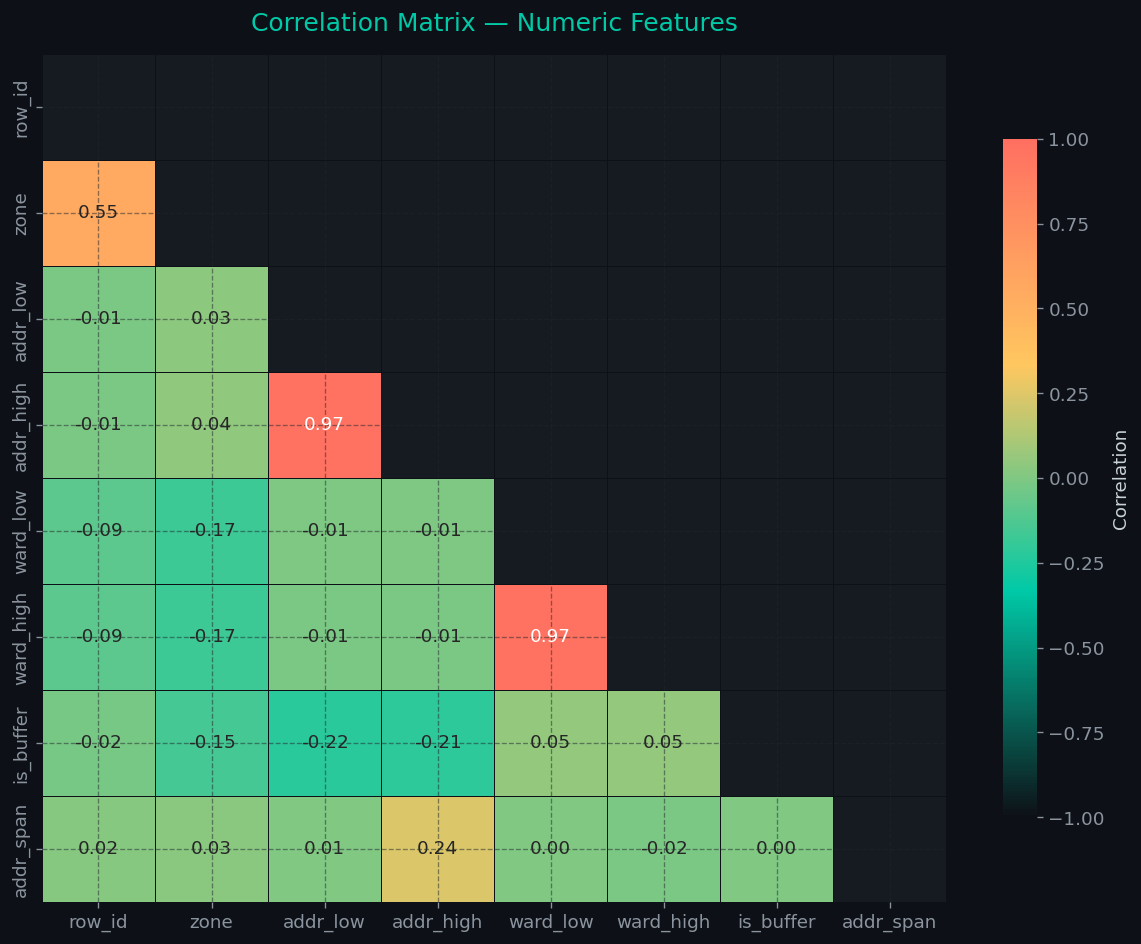

In [13]:
# ============================================================
# PILLAR 2 — DIAGNOSTIC ANALYTICS
# ============================================================

# ---------- 2A. Correlation Matrix ----------
fig, ax = plt.subplots(figsize=(10, 8))

numeric_df = df.select_dtypes(include='number')
corr = numeric_df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, fmt='.2f', cmap=CMAP_MAIN,
            linewidths=0.5, linecolor=COLORS['bg_dark'],
            cbar_kws={'shrink': 0.8, 'label': 'Correlation'},
            ax=ax, vmin=-1, vmax=1)
ax.set_title('Correlation Matrix — Numeric Features',
             fontsize=15, color=COLORS['accent'], pad=14)
plt.tight_layout()
plt.show()

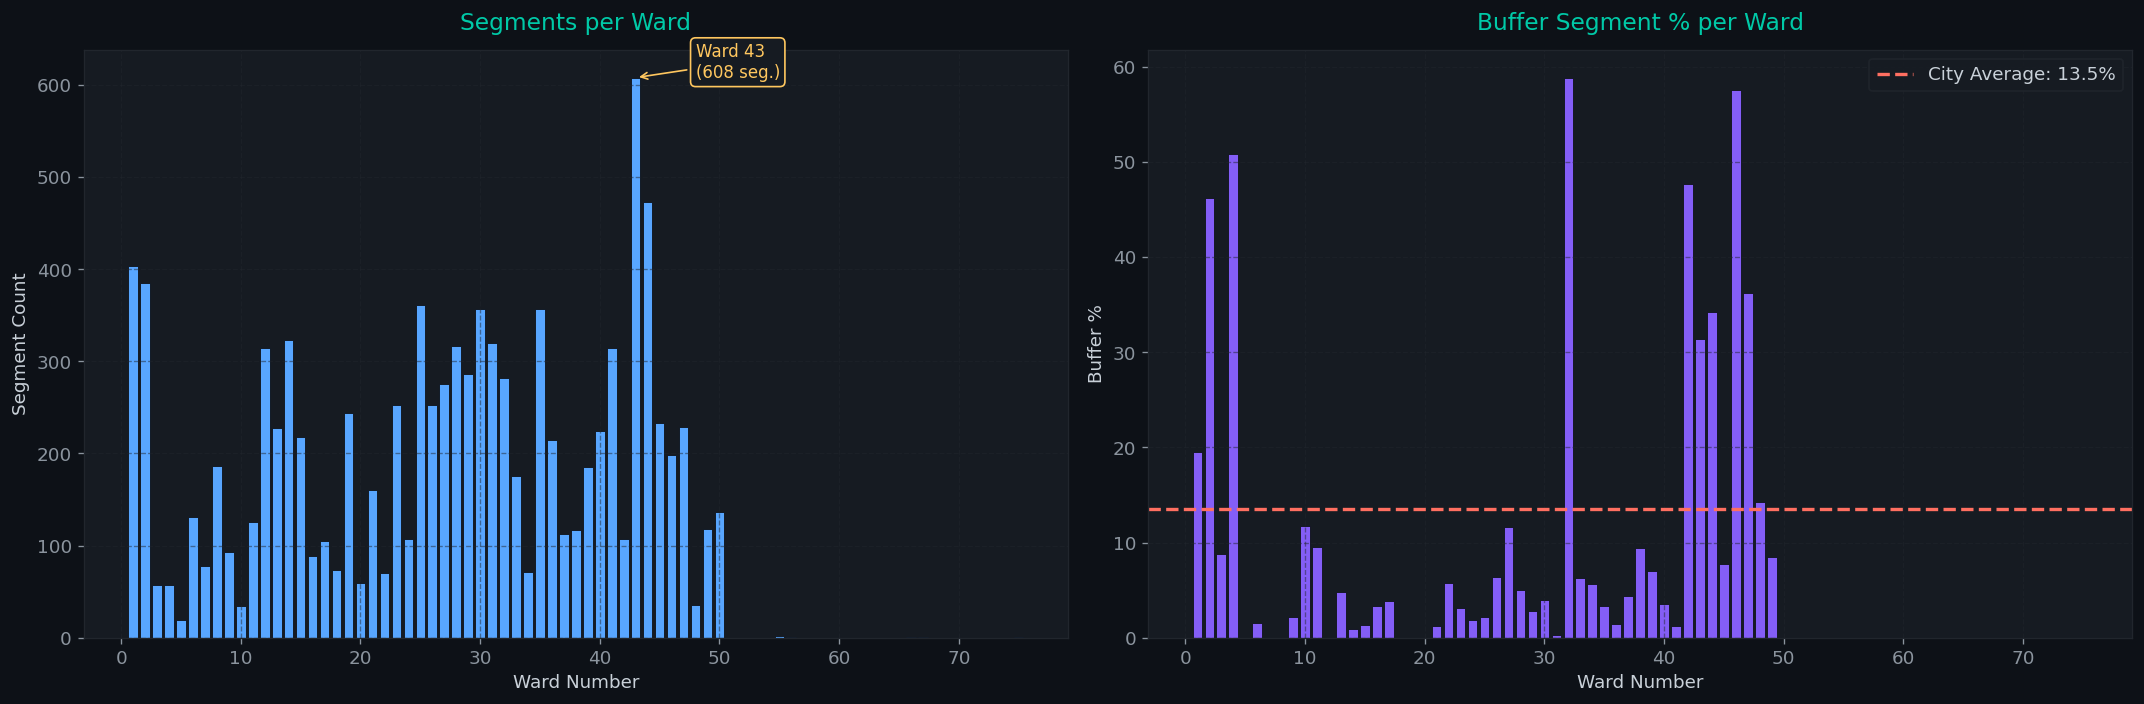

In [14]:
# ---------- 2B. Ward Distribution & Concentration ----------
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

ward_col = [c for c in df.columns if 'ward' in c and 'low' in c]
if ward_col:
    wc = ward_col[0]
    ward_counts = df[wc].value_counts().sort_index()
    ward_counts = ward_counts[ward_counts.index > 0]  # exclude 0 fill

    axes[0].bar(ward_counts.index.astype(int), ward_counts.values,
                color=COLORS['accent5'], edgecolor=COLORS['bg_dark'], linewidth=0.5)
    axes[0].set_title('Segments per Ward', fontsize=14,
                       color=COLORS['accent'], pad=12)
    axes[0].set_xlabel('Ward Number')
    axes[0].set_ylabel('Segment Count')

    # Highlight top ward
    top_ward = ward_counts.idxmax()
    axes[0].annotate(
        f'Ward {int(top_ward)}\n({ward_counts.max()} seg.)',
        xy=(top_ward, ward_counts.max()),
        xytext=(top_ward + 5, ward_counts.max()),
        fontsize=10, color=COLORS['accent4'],
        arrowprops=dict(arrowstyle='->', color=COLORS['accent4']),
        bbox=dict(boxstyle='round', fc=COLORS['bg_card'], ec=COLORS['accent4']))

# Buffer % by ward
    ward_buf = df[df[wc] > 0].groupby(wc)['is_buffer'].mean().sort_index() * 100
    axes[1].bar(ward_buf.index.astype(int), ward_buf.values,
                color=COLORS['accent3'], edgecolor=COLORS['bg_dark'], linewidth=0.5)
    axes[1].set_title('Buffer Segment % per Ward', fontsize=14,
                       color=COLORS['accent'], pad=12)
    axes[1].set_xlabel('Ward Number')
    axes[1].set_ylabel('Buffer %')
    axes[1].axhline(df['is_buffer'].mean()*100, color=COLORS['accent2'],
                     ls='--', lw=2, label=f'City Average: {df["is_buffer"].mean()*100:.1f}%')
    axes[1].legend()

plt.tight_layout()
plt.show()

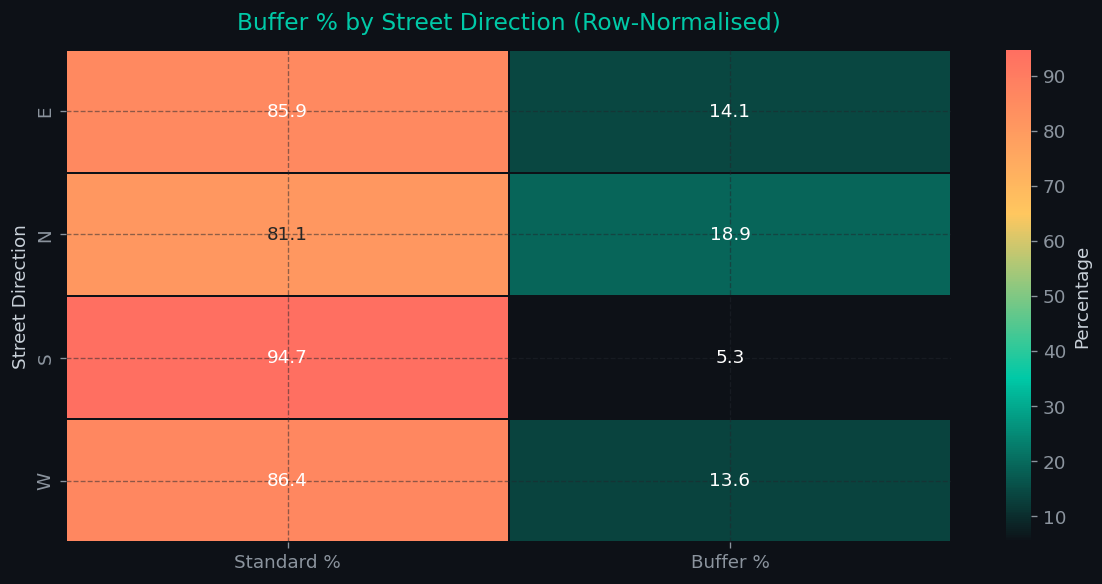

In [15]:
# ---------- 2C. Street Direction × Buffer Cross-Tab Heatmap ----------
fig, ax = plt.subplots(figsize=(10, 5))

if 'street_direction' in df.columns:
    ct2 = pd.crosstab(df['street_direction'], df['is_buffer'], normalize='index') * 100
    ct2.columns = ['Standard %', 'Buffer %']
    sns.heatmap(ct2, annot=True, fmt='.1f', cmap=CMAP_MAIN,
                linewidths=1, linecolor=COLORS['bg_dark'], ax=ax,
                cbar_kws={'label': 'Percentage'})
    ax.set_title('Buffer % by Street Direction (Row-Normalised)',
                 fontsize=14, color=COLORS['accent'], pad=12)
    ax.set_ylabel('Street Direction')

plt.tight_layout()
plt.show()

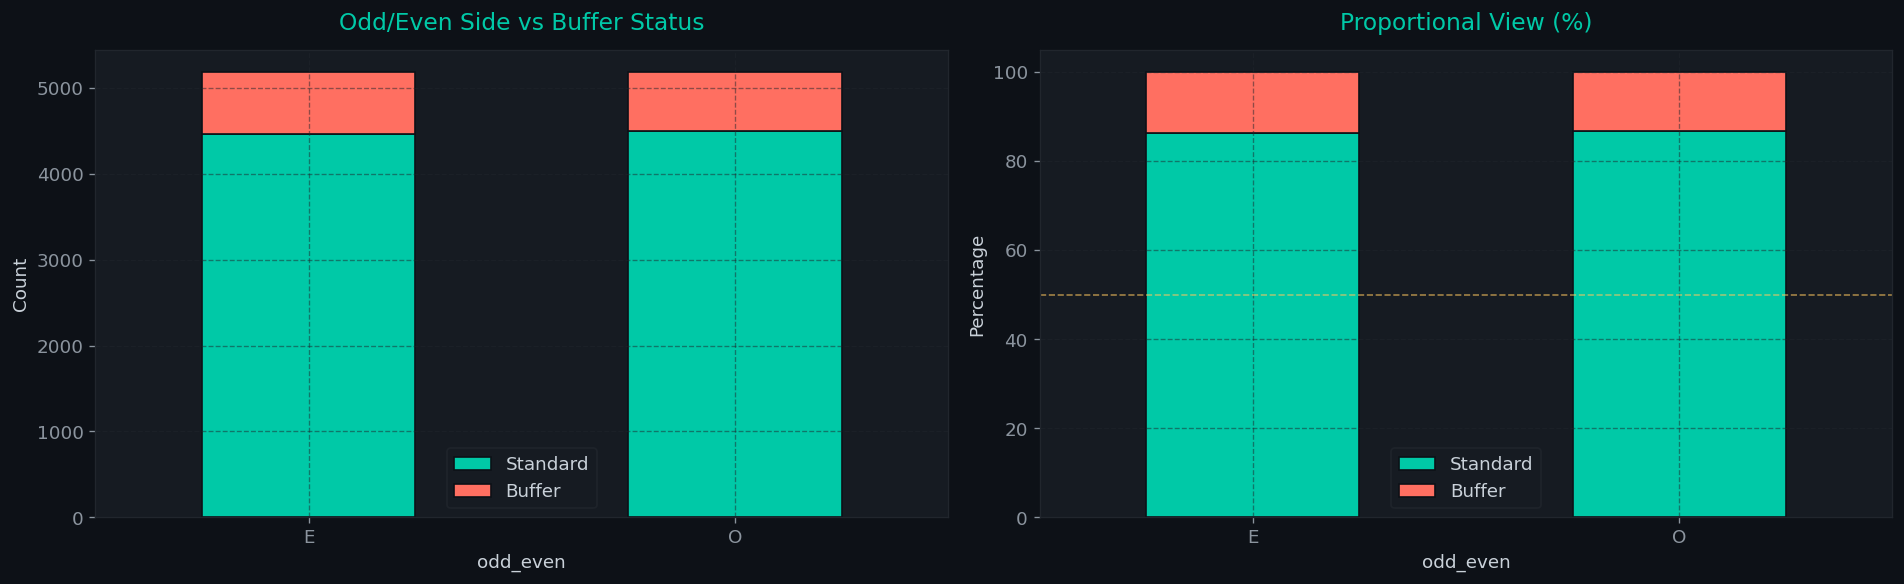

In [16]:
# ---------- 2D. Odd/Even vs Buffer — Stacked Analysis ----------
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

if 'odd_even' in df.columns:
    ct3 = pd.crosstab(df['odd_even'], df['is_buffer'])
    ct3.columns = ['Standard', 'Buffer']

    ct3.plot(kind='bar', stacked=True, ax=axes[0],
             color=[COLORS['accent'], COLORS['accent2']],
             edgecolor=COLORS['bg_dark'])
    axes[0].set_title('Odd/Even Side vs Buffer Status',
                       fontsize=14, color=COLORS['accent'], pad=12)
    axes[0].set_ylabel('Count')
    axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)

    # Proportional
    ct3_pct = ct3.div(ct3.sum(axis=1), axis=0) * 100
    ct3_pct.plot(kind='bar', stacked=True, ax=axes[1],
                 color=[COLORS['accent'], COLORS['accent2']],
                 edgecolor=COLORS['bg_dark'])
    axes[1].set_title('Proportional View (%)',
                       fontsize=14, color=COLORS['accent'], pad=12)
    axes[1].set_ylabel('Percentage')
    axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)
    axes[1].axhline(50, color=COLORS['accent4'], ls='--', lw=1, alpha=0.6)

plt.tight_layout()
plt.show()

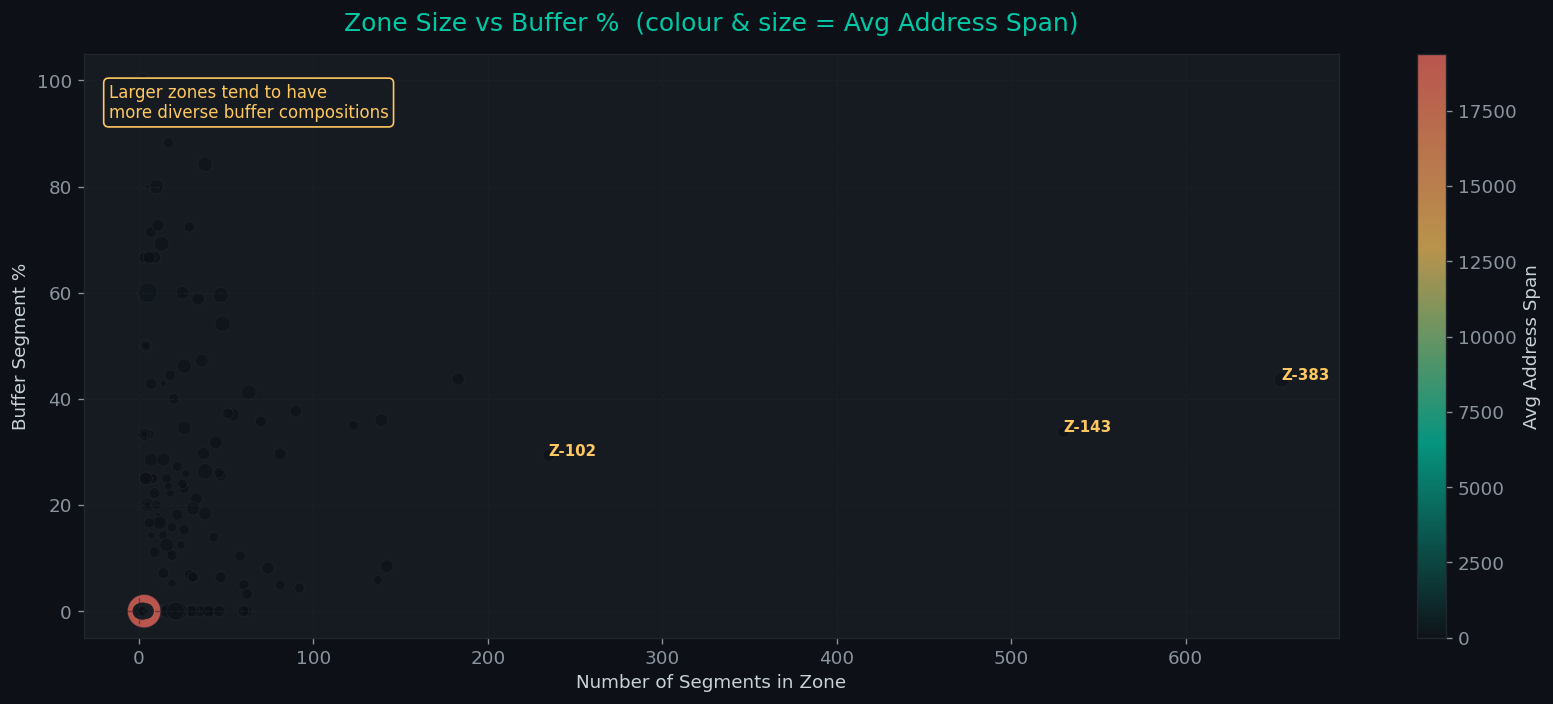

In [17]:
# ---------- 2E. Zone Size vs Buffer % — Scatter Diagnostic ----------
fig, ax = plt.subplots(figsize=(14, 6))

zone_stats = df.groupby('zone').agg(
    seg_count=('zone', 'size'),
    buffer_pct=('is_buffer', 'mean'),
    avg_span=('addr_span', 'mean')
).reset_index()
zone_stats['buffer_pct'] *= 100

sc = ax.scatter(zone_stats['seg_count'], zone_stats['buffer_pct'],
                c=zone_stats['avg_span'], cmap=CMAP_MAIN,
                s=zone_stats['avg_span'].clip(10, 500)*0.8,
                alpha=0.7, edgecolors=COLORS['grid'], linewidths=0.5)
ax.set_title('Zone Size vs Buffer %  (colour & size = Avg Address Span)',
             fontsize=15, color=COLORS['accent'], pad=14)
ax.set_xlabel('Number of Segments in Zone')
ax.set_ylabel('Buffer Segment %')
plt.colorbar(sc, label='Avg Address Span', ax=ax)

# Annotate outliers
for _, row in zone_stats.nlargest(3, 'seg_count').iterrows():
    ax.annotate(f'Z-{int(row.zone)}', (row.seg_count, row.buffer_pct),
                fontsize=9, color=COLORS['accent4'], fontweight='bold')

ax.text(0.02, 0.95,
        'Larger zones tend to have\nmore diverse buffer compositions',
        transform=ax.transAxes, fontsize=10, color=COLORS['accent4'],
        va='top', bbox=dict(boxstyle='round', fc=COLORS['bg_card'],
                            ec=COLORS['accent4']))

plt.tight_layout()
plt.show()

<a id="pillar3"></a>
<div style="
    background: linear-gradient(90deg, #0D1117, #161B22);
    padding: 25px 30px;
    border-radius: 14px;
    border: 1px solid #845EF7;
    margin-bottom: 15px;
    box-shadow: 0 0 15px rgba(132,94,247,0.1);
">
<h1 style="color:#845EF7; margin:0;">🔮 Pillar 3 — Predictive Analytics</h1>
<h3 style="color:#C9D1D9; font-weight:300; margin-top:5px;">"What Will Happen?"</h3>
<p style="color:#8B949E; margin-bottom:0;">
We build ML models to predict whether a segment is <strong>Buffer</strong> or <strong>Standard</strong> and use KMeans clustering to discover natural zone archetypes.
</p>
</div>

In [18]:
# ============================================================
# PILLAR 3 — PREDICTIVE ANALYTICS
# ============================================================

# ---------- 3A. Feature Engineering ----------
le_dict = {}
cat_cols = df.select_dtypes(include='object').columns.tolist()
# Exclude columns we don't want
cat_cols = [c for c in cat_cols if c not in ['status', 'buffer']]

df_ml = df.copy()
for c in cat_cols:
    le = LabelEncoder()
    df_ml[c + '_enc'] = le.fit_transform(df_ml[c].astype(str))
    le_dict[c] = le

feature_cols = ['zone', 'addr_span'] + [c + '_enc' for c in cat_cols]
# Add ward if exists
for c in df_ml.columns:
    if 'ward' in c and 'enc' not in c:
        feature_cols.append(c)

feature_cols = [c for c in feature_cols if c in df_ml.columns]

X = df_ml[feature_cols].fillna(0)
y = df_ml['is_buffer']

print(f"📐 Feature matrix: {X.shape}")
print(f"📌 Target balance:\n{y.value_counts().to_string()}")

📐 Feature matrix: (10369, 8)
📌 Target balance:
is_buffer
0    8966
1    1403


In [19]:
# ---------- 3B. Random Forest Classifier ----------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y)

rf = RandomForestClassifier(n_estimators=200, max_depth=12,
                             random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

acc = (y_pred == y_test).mean()
print(f"🎯 Random Forest Accuracy: {acc:.4f}\n")
print(classification_report(y_test, y_pred, target_names=['Standard', 'Buffer']))

🎯 Random Forest Accuracy: 0.9202

              precision    recall  f1-score   support

    Standard       0.93      0.98      0.95      2242
      Buffer       0.81      0.54      0.65       351

    accuracy                           0.92      2593
   macro avg       0.87      0.76      0.80      2593
weighted avg       0.91      0.92      0.91      2593



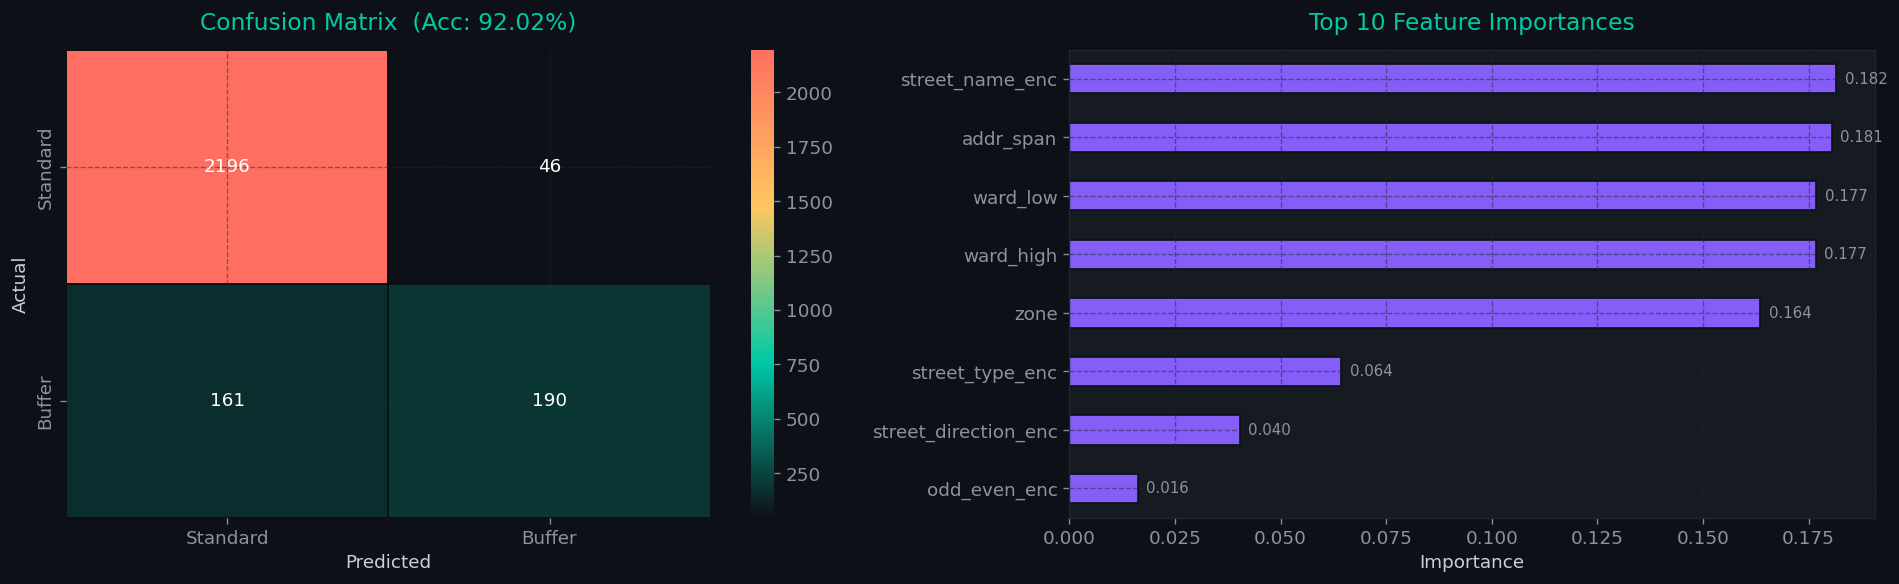

In [20]:
# ---------- 3C. Confusion Matrix Visualisation ----------
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap=CMAP_MAIN,
            xticklabels=['Standard', 'Buffer'],
            yticklabels=['Standard', 'Buffer'],
            linewidths=1, linecolor=COLORS['bg_dark'], ax=axes[0])
axes[0].set_title(f'Confusion Matrix  (Acc: {acc:.2%})',
                   fontsize=14, color=COLORS['accent'], pad=12)
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Feature importance
feat_imp = pd.Series(rf.feature_importances_, index=feature_cols).sort_values()
feat_imp.tail(10).plot.barh(ax=axes[1], color=COLORS['accent3'],
                             edgecolor=COLORS['bg_dark'])
axes[1].set_title('Top 10 Feature Importances', fontsize=14,
                   color=COLORS['accent'], pad=12)
axes[1].set_xlabel('Importance')
for i, v in enumerate(feat_imp.tail(10).values):
    axes[1].text(v + 0.002, i, f'{v:.3f}', va='center',
                 fontsize=9, color=COLORS['text_muted'])

plt.tight_layout()
plt.show()

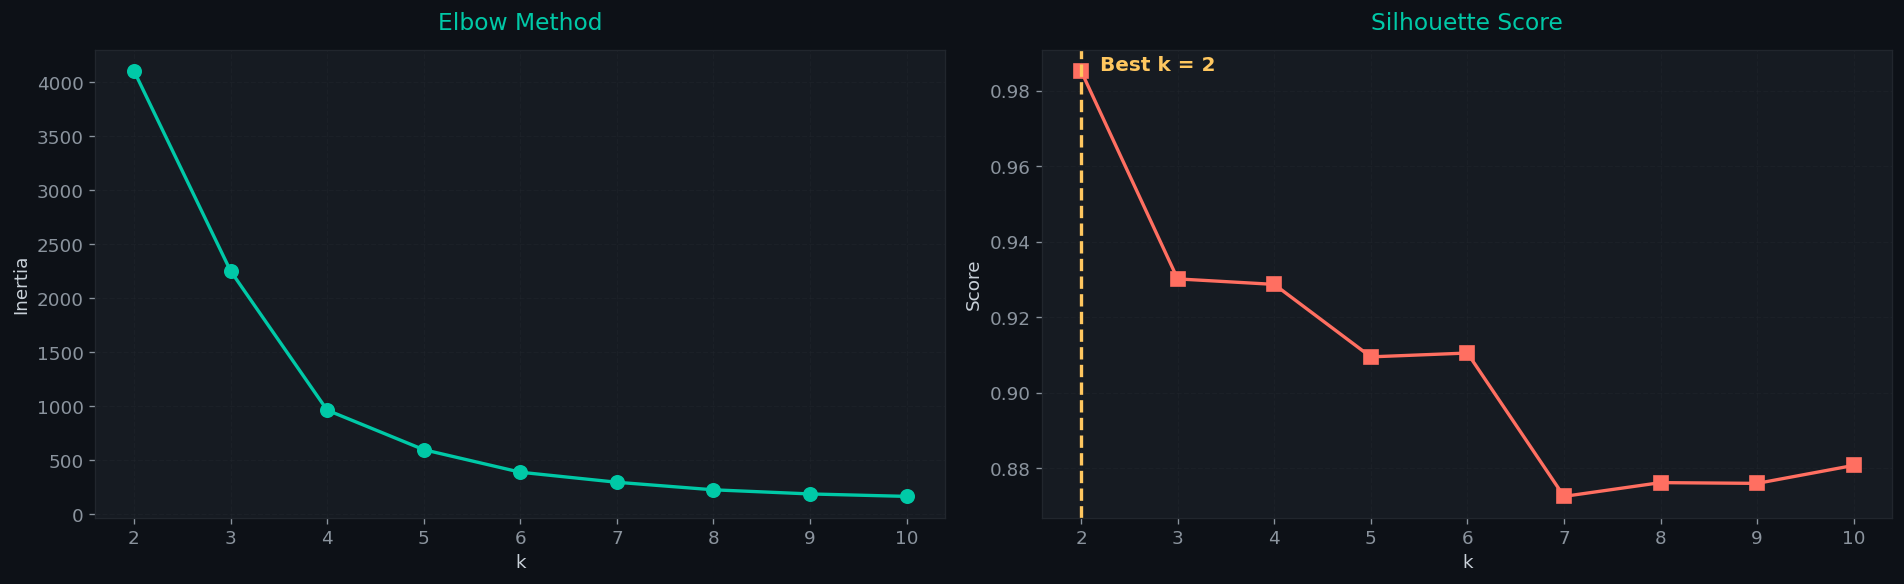

✅ Optimal k = 2


In [21]:
# ---------- 3D. KMeans Clustering — Zone Archetypes ----------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(zone_stats[['seg_count', 'buffer_pct', 'avg_span']].fillna(0))

# Elbow method
inertias, sils = [], []
K_range = range(2, 11)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertias.append(km.inertia_)
    sils.append(silhouette_score(X_scaled, km.labels_))

fig, axes = plt.subplots(1, 2, figsize=(16, 5))
axes[0].plot(K_range, inertias, 'o-', color=COLORS['accent'], lw=2, markersize=8)
axes[0].set_title('Elbow Method', fontsize=14, color=COLORS['accent'], pad=12)
axes[0].set_xlabel('k'); axes[0].set_ylabel('Inertia')

axes[1].plot(K_range, sils, 's-', color=COLORS['accent2'], lw=2, markersize=8)
axes[1].set_title('Silhouette Score', fontsize=14, color=COLORS['accent'], pad=12)
axes[1].set_xlabel('k'); axes[1].set_ylabel('Score')

best_k = K_range[np.argmax(sils)]
axes[1].axvline(best_k, color=COLORS['accent4'], ls='--', lw=2)
axes[1].text(best_k + 0.2, max(sils), f'Best k = {best_k}',
             fontsize=12, color=COLORS['accent4'], fontweight='bold')

plt.tight_layout()
plt.show()
print(f"✅ Optimal k = {best_k}")

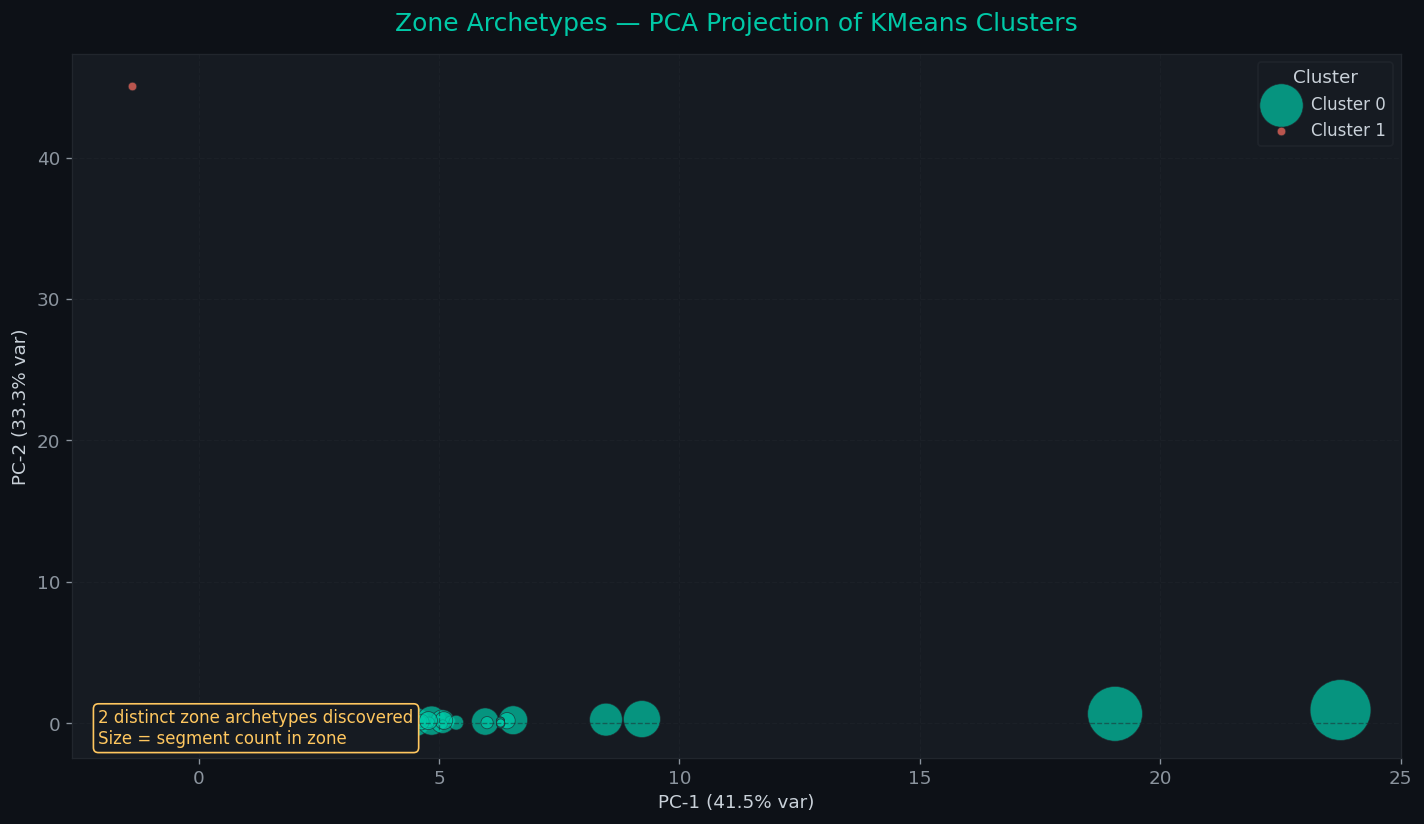

In [22]:
# ---------- 3E. Cluster Visualisation (PCA 2D) ----------
km_final = KMeans(n_clusters=best_k, random_state=42, n_init=10)
zone_stats['cluster'] = km_final.fit_predict(X_scaled)

pca = PCA(n_components=2)
pc = pca.fit_transform(X_scaled)

fig, ax = plt.subplots(figsize=(12, 7))
for cl in range(best_k):
    mask = zone_stats['cluster'] == cl
    ax.scatter(pc[mask, 0], pc[mask, 1], label=f'Cluster {cl}',
               s=zone_stats.loc[mask, 'seg_count'] * 2 + 20,
               alpha=0.7, edgecolors=COLORS['grid'], linewidths=0.5,
               color=PALETTE_SEQ[cl % len(PALETTE_SEQ)])

ax.set_title('Zone Archetypes — PCA Projection of KMeans Clusters',
             fontsize=15, color=COLORS['accent'], pad=14)
ax.set_xlabel(f'PC-1 ({pca.explained_variance_ratio_[0]:.1%} var)')
ax.set_ylabel(f'PC-2 ({pca.explained_variance_ratio_[1]:.1%} var)')
ax.legend(title='Cluster', fontsize=10)

# Insight
ax.text(0.02, 0.02,
        f'{best_k} distinct zone archetypes discovered\n'
        f'Size = segment count in zone',
        transform=ax.transAxes, fontsize=10, color=COLORS['accent4'],
        bbox=dict(boxstyle='round', fc=COLORS['bg_card'], ec=COLORS['accent4']))

plt.tight_layout()
plt.show()

In [23]:
# ---------- 3F. Cluster Profile Summary ----------
profile = zone_stats.groupby('cluster').agg(
    n_zones=('zone', 'count'),
    avg_segments=('seg_count', 'mean'),
    avg_buffer_pct=('buffer_pct', 'mean'),
    avg_addr_span=('avg_span', 'mean')
).round(1)

# Styled display
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: #00C9A740; color: #00C9A7; font-weight:bold'
            if v else '' for v in is_max]

profile_styled = profile.style\
    .apply(highlight_max)\
    .set_caption('🗂 Cluster Profile Summary')\
    .set_table_styles([
        {'selector': 'caption', 'props': [('font-size', '16px'), ('color', '#00C9A7')]},
        {'selector': 'th', 'props': [('background-color', '#161B22'), ('color', '#C9D1D9')]},
        {'selector': 'td', 'props': [('background-color', '#0D1117'), ('color', '#C9D1D9')]},
    ])
profile_styled

,n_zones,avg_segments,avg_buffer_pct,avg_addr_span
cluster,,,,
0,2046,5.100000,2.200000,65.400000
1,1,3.000000,0.000000,19387.300000


<a id="pillar4"></a>
<div style="
    background: linear-gradient(90deg, #0D1117, #161B22);
    padding: 25px 30px;
    border-radius: 14px;
    border: 1px solid #FFC75F;
    margin-bottom: 15px;
    box-shadow: 0 0 15px rgba(255,199,95,0.1);
">
<h1 style="color:#FFC75F; margin:0;">💡 Pillar 4 — Prescriptive Analytics</h1>
<h3 style="color:#C9D1D9; font-weight:300; margin-top:5px;">"What Should We Do?"</h3>
<p style="color:#8B949E; margin-bottom:0;">
Based on all insights gathered, we formulate data-driven recommendations for urban planners, legislators, and residents.
</p>
</div>

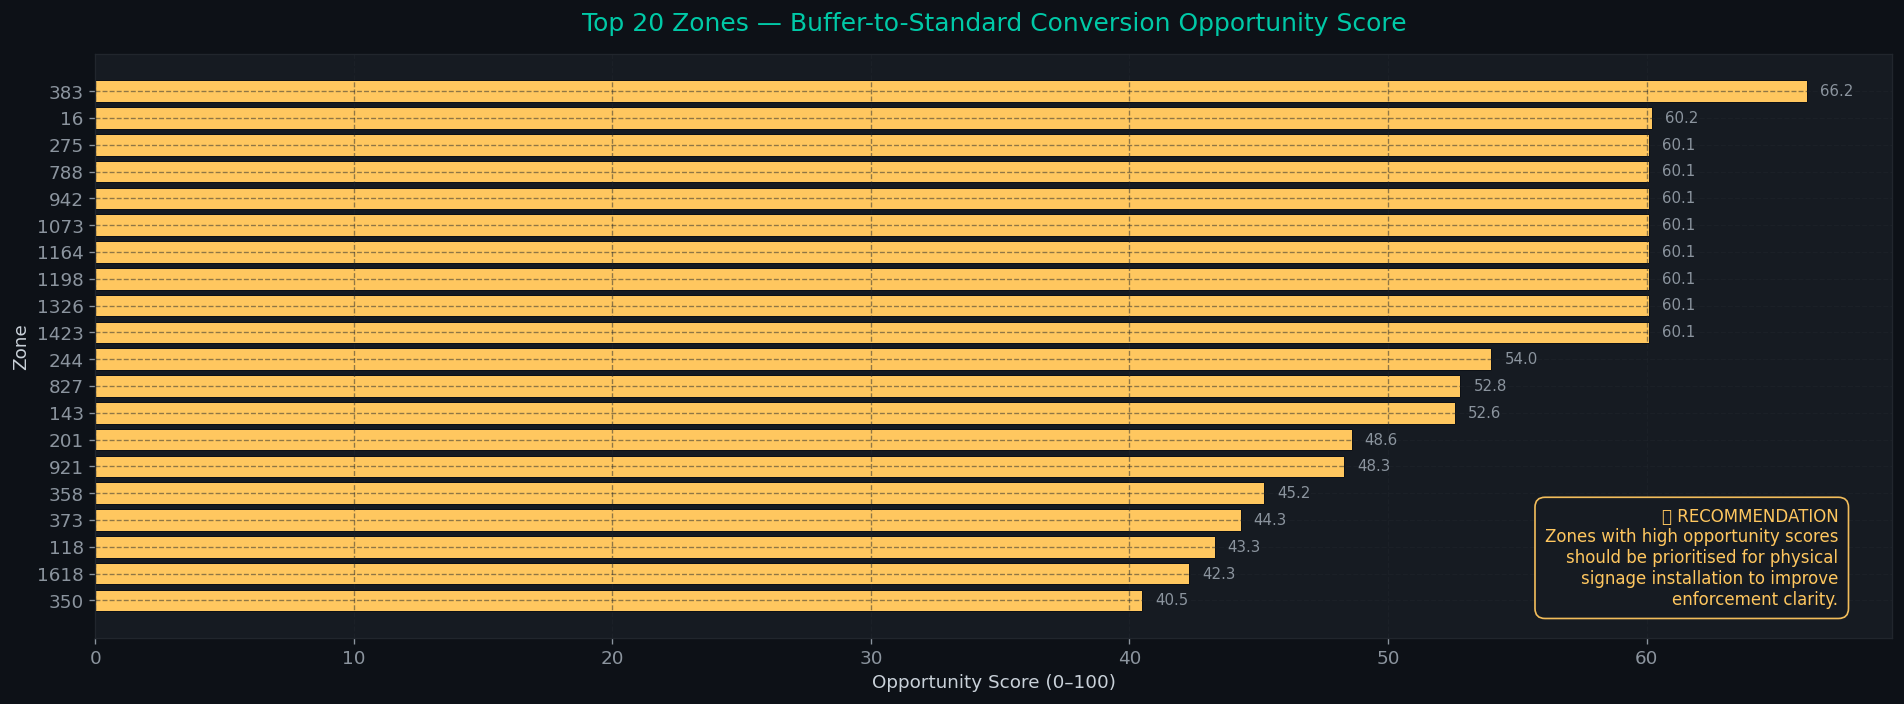

In [24]:
# ============================================================
# PILLAR 4 — PRESCRIPTIVE ANALYTICS
# ============================================================

# ---------- 4A. Buffer Conversion Opportunity Score ----------
# Zones with high buffer % are candidates for physical sign installation

zone_stats['opportunity_score'] = (
    zone_stats['buffer_pct'] * 0.6 +
    (zone_stats['seg_count'] / zone_stats['seg_count'].max()) * 100 * 0.4
).round(1)

fig, ax = plt.subplots(figsize=(16, 6))

top_opp = zone_stats.nlargest(20, 'opportunity_score')
bars = ax.barh(top_opp['zone'].astype(str)[::-1],
               top_opp['opportunity_score'].values[::-1],
               color=COLORS['accent4'], edgecolor=COLORS['bg_dark'], linewidth=0.6)
ax.set_title('Top 20 Zones — Buffer-to-Standard Conversion Opportunity Score',
             fontsize=15, color=COLORS['accent'], pad=14)
ax.set_xlabel('Opportunity Score (0–100)')
ax.set_ylabel('Zone')

for bar in bars:
    w = bar.get_width()
    ax.text(w + 0.5, bar.get_y() + bar.get_height()/2,
            f'{w:.1f}', va='center', fontsize=9, color=COLORS['text_muted'])

ax.text(0.97, 0.05,
        '💡 RECOMMENDATION\n'
        'Zones with high opportunity scores\n'
        'should be prioritised for physical\n'
        'signage installation to improve\n'
        'enforcement clarity.',
        transform=ax.transAxes, ha='right', va='bottom', fontsize=10,
        color=COLORS['accent4'],
        bbox=dict(boxstyle='round,pad=0.6', fc=COLORS['bg_card'],
                  ec=COLORS['accent4'], alpha=0.95))
plt.tight_layout()
plt.show()

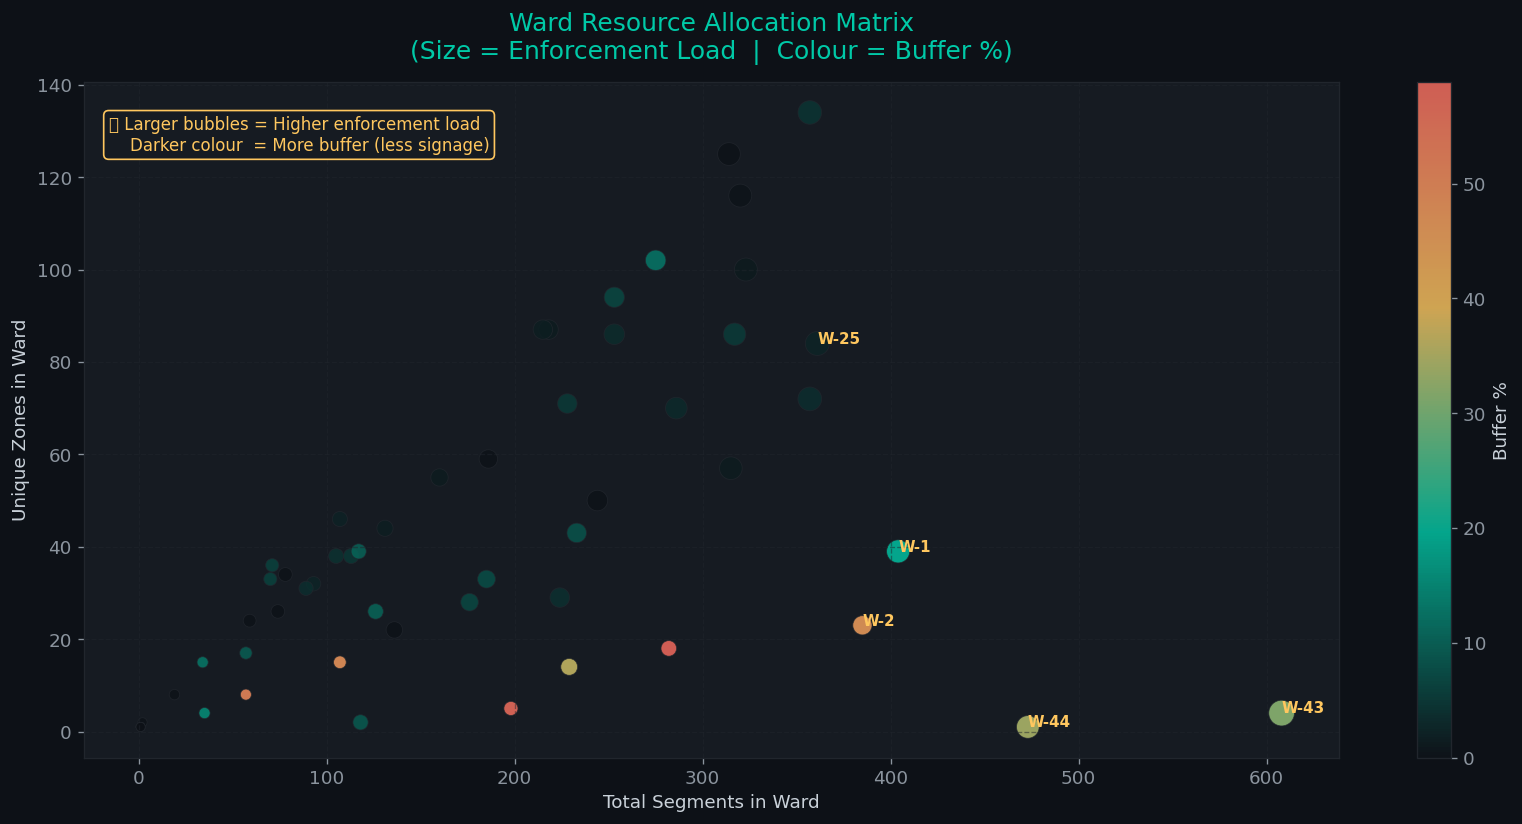

In [25]:
# ---------- 4B. Ward-Level Resource Allocation Matrix ----------
fig, ax = plt.subplots(figsize=(14, 7))

ward_col_name = [c for c in df.columns if 'ward' in c and 'low' in c]
if ward_col_name:
    wc = ward_col_name[0]
    ward_agg = df[df[wc] > 0].groupby(wc).agg(
        total_segments=('zone', 'size'),
        unique_zones=('zone', 'nunique'),
        buffer_ratio=('is_buffer', 'mean'),
        avg_span=('addr_span', 'mean')
    ).reset_index()

    ward_agg['enforcement_load'] = (
        ward_agg['total_segments'] * (1 - ward_agg['buffer_ratio'])
    ).astype(int)

    sc = ax.scatter(
        ward_agg['total_segments'],
        ward_agg['unique_zones'],
        c=ward_agg['buffer_ratio'] * 100,
        s=ward_agg['enforcement_load'] * 0.5 + 30,
        cmap=CMAP_MAIN, alpha=0.8,
        edgecolors=COLORS['grid'], linewidths=0.5)

    ax.set_title('Ward Resource Allocation Matrix\n'
                 '(Size = Enforcement Load  |  Colour = Buffer %)',
                 fontsize=15, color=COLORS['accent'], pad=14)
    ax.set_xlabel('Total Segments in Ward')
    ax.set_ylabel('Unique Zones in Ward')
    plt.colorbar(sc, label='Buffer %', ax=ax)

    # Label top 5 busiest wards
    for _, row in ward_agg.nlargest(5, 'total_segments').iterrows():
        ax.annotate(f'W-{int(row[wc])}',
                    (row['total_segments'], row['unique_zones']),
                    fontsize=9, color=COLORS['accent4'], fontweight='bold')

    ax.text(0.02, 0.95,
            '💡 Larger bubbles = Higher enforcement load\n'
            '    Darker colour  = More buffer (less signage)',
            transform=ax.transAxes, fontsize=10, va='top',
            color=COLORS['accent4'],
            bbox=dict(boxstyle='round', fc=COLORS['bg_card'], ec=COLORS['accent4']))

plt.tight_layout()
plt.show()

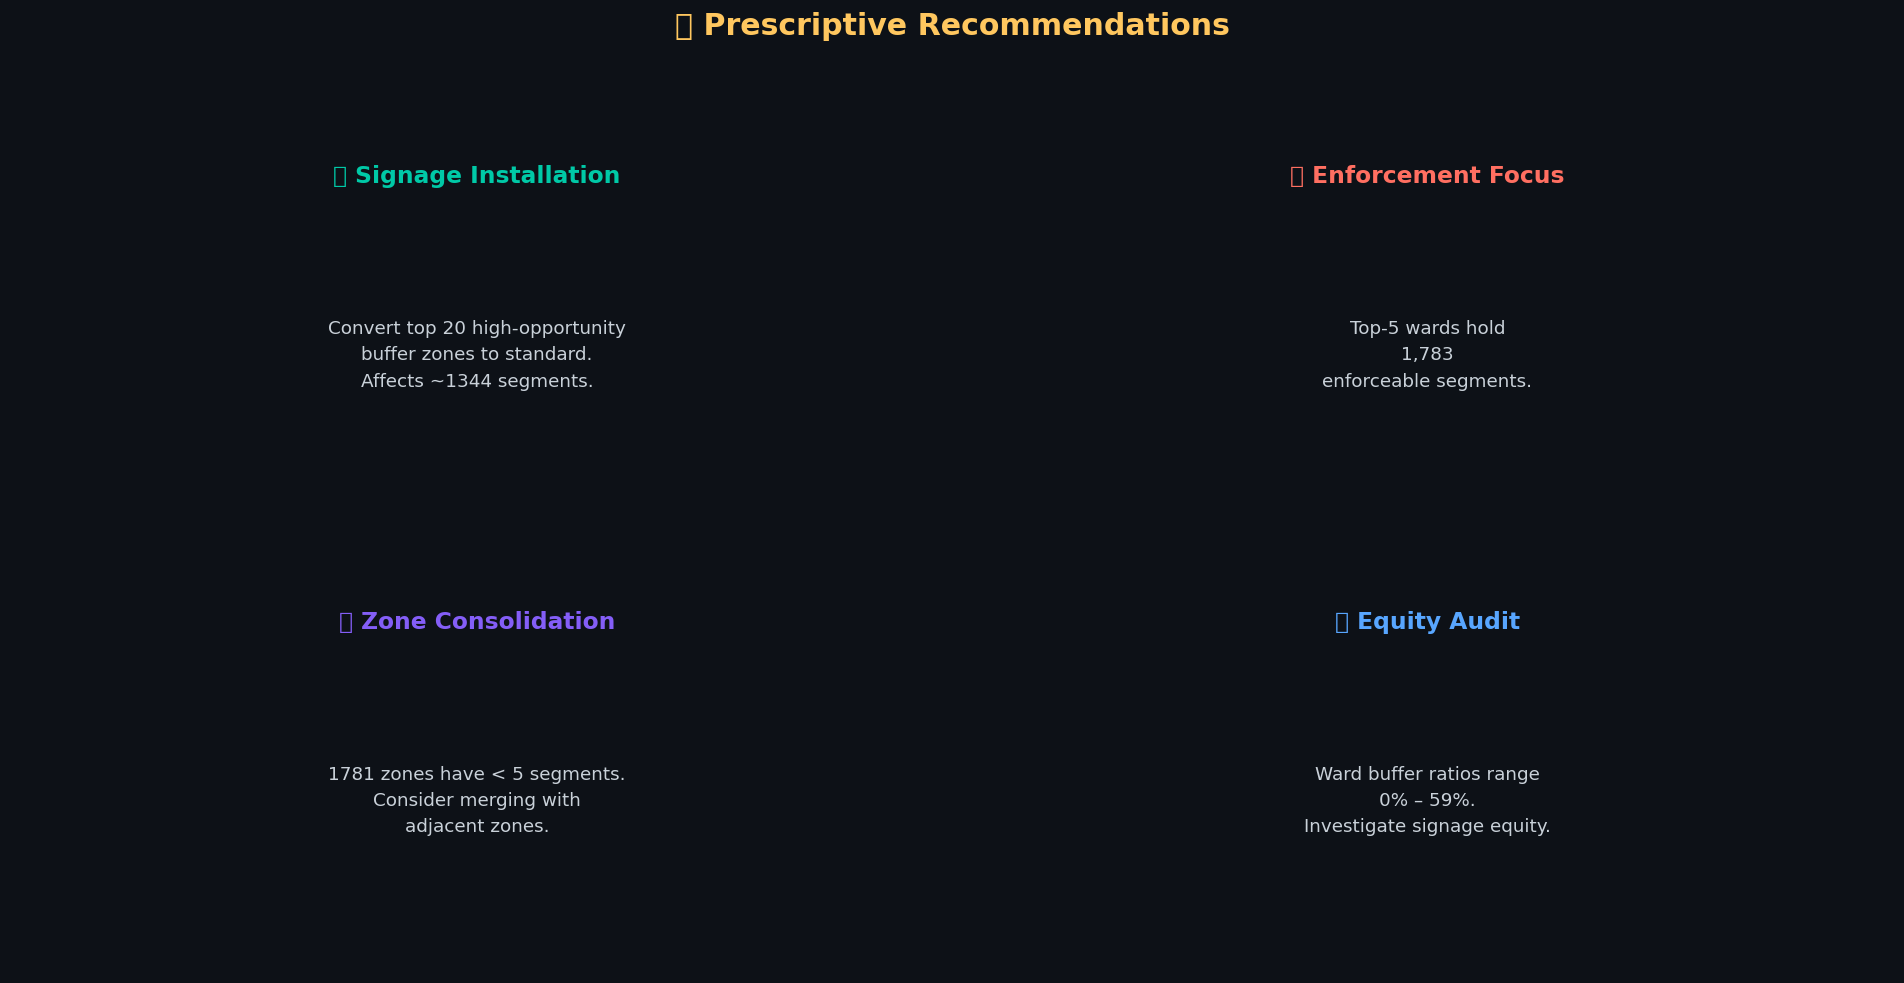

In [26]:
# ---------- 4C. Prescriptive Summary Cards ----------
fig, axes = plt.subplots(2, 2, figsize=(16, 8))
fig.suptitle('💡 Prescriptive Recommendations', fontsize=18,
             color=COLORS['accent4'], fontweight='bold', y=1.02)

cards = [
    ("🪧 Signage Installation",
     f"Convert top {top_opp.shape[0]} high-opportunity\n"
     f"buffer zones to standard.\n"
     f"Affects ~{int(top_opp['avg_segments'].sum() if 'avg_segments' in top_opp.columns else top_opp['seg_count'].sum())} segments.",
     COLORS['accent']),
    ("👮 Enforcement Focus",
     f"Top-5 wards hold\n"
     f"{ward_agg.nlargest(5, 'enforcement_load')['enforcement_load'].sum():,}\n"
     f"enforceable segments.",
     COLORS['accent2']),
    ("📊 Zone Consolidation",
     f"{(zone_stats['seg_count'] < 5).sum()} zones have < 5 segments.\n"
     f"Consider merging with\n"
     f"adjacent zones.",
     COLORS['accent3']),
    ("🗺 Equity Audit",
     f"Ward buffer ratios range\n"
     f"{ward_agg['buffer_ratio'].min()*100:.0f}% – {ward_agg['buffer_ratio'].max()*100:.0f}%.\n"
     f"Investigate signage equity.",
     COLORS['accent5']),
]

for ax, (title, body, clr) in zip(axes.ravel(), cards):
    ax.set_xlim(0, 1); ax.set_ylim(0, 1)
    ax.text(0.5, 0.82, title, ha='center', va='center',
            fontsize=14, fontweight='bold', color=clr)
    ax.text(0.5, 0.4, body, ha='center', va='center',
            fontsize=11, color=COLORS['text'], linespacing=1.6)
    ax.set_axis_off()
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_edgecolor(clr)
        spine.set_linewidth(2)
    ax.patch.set_facecolor(COLORS['bg_card'])

plt.tight_layout()
plt.show()

<a id="dashboard"></a>
<div style="
    background: linear-gradient(90deg, #0D1117, #161B22);
    padding: 25px 30px;
    border-radius: 14px;
    border: 1px solid #58A6FF;
    margin-bottom: 15px;
    box-shadow: 0 0 15px rgba(88,166,255,0.1);
">
<h1 style="color:#58A6FF; margin:0;">📈 Executive Dashboard</h1>
<h3 style="color:#C9D1D9; font-weight:300; margin-top:5px;">All-in-One Visual Summary</h3>
</div>

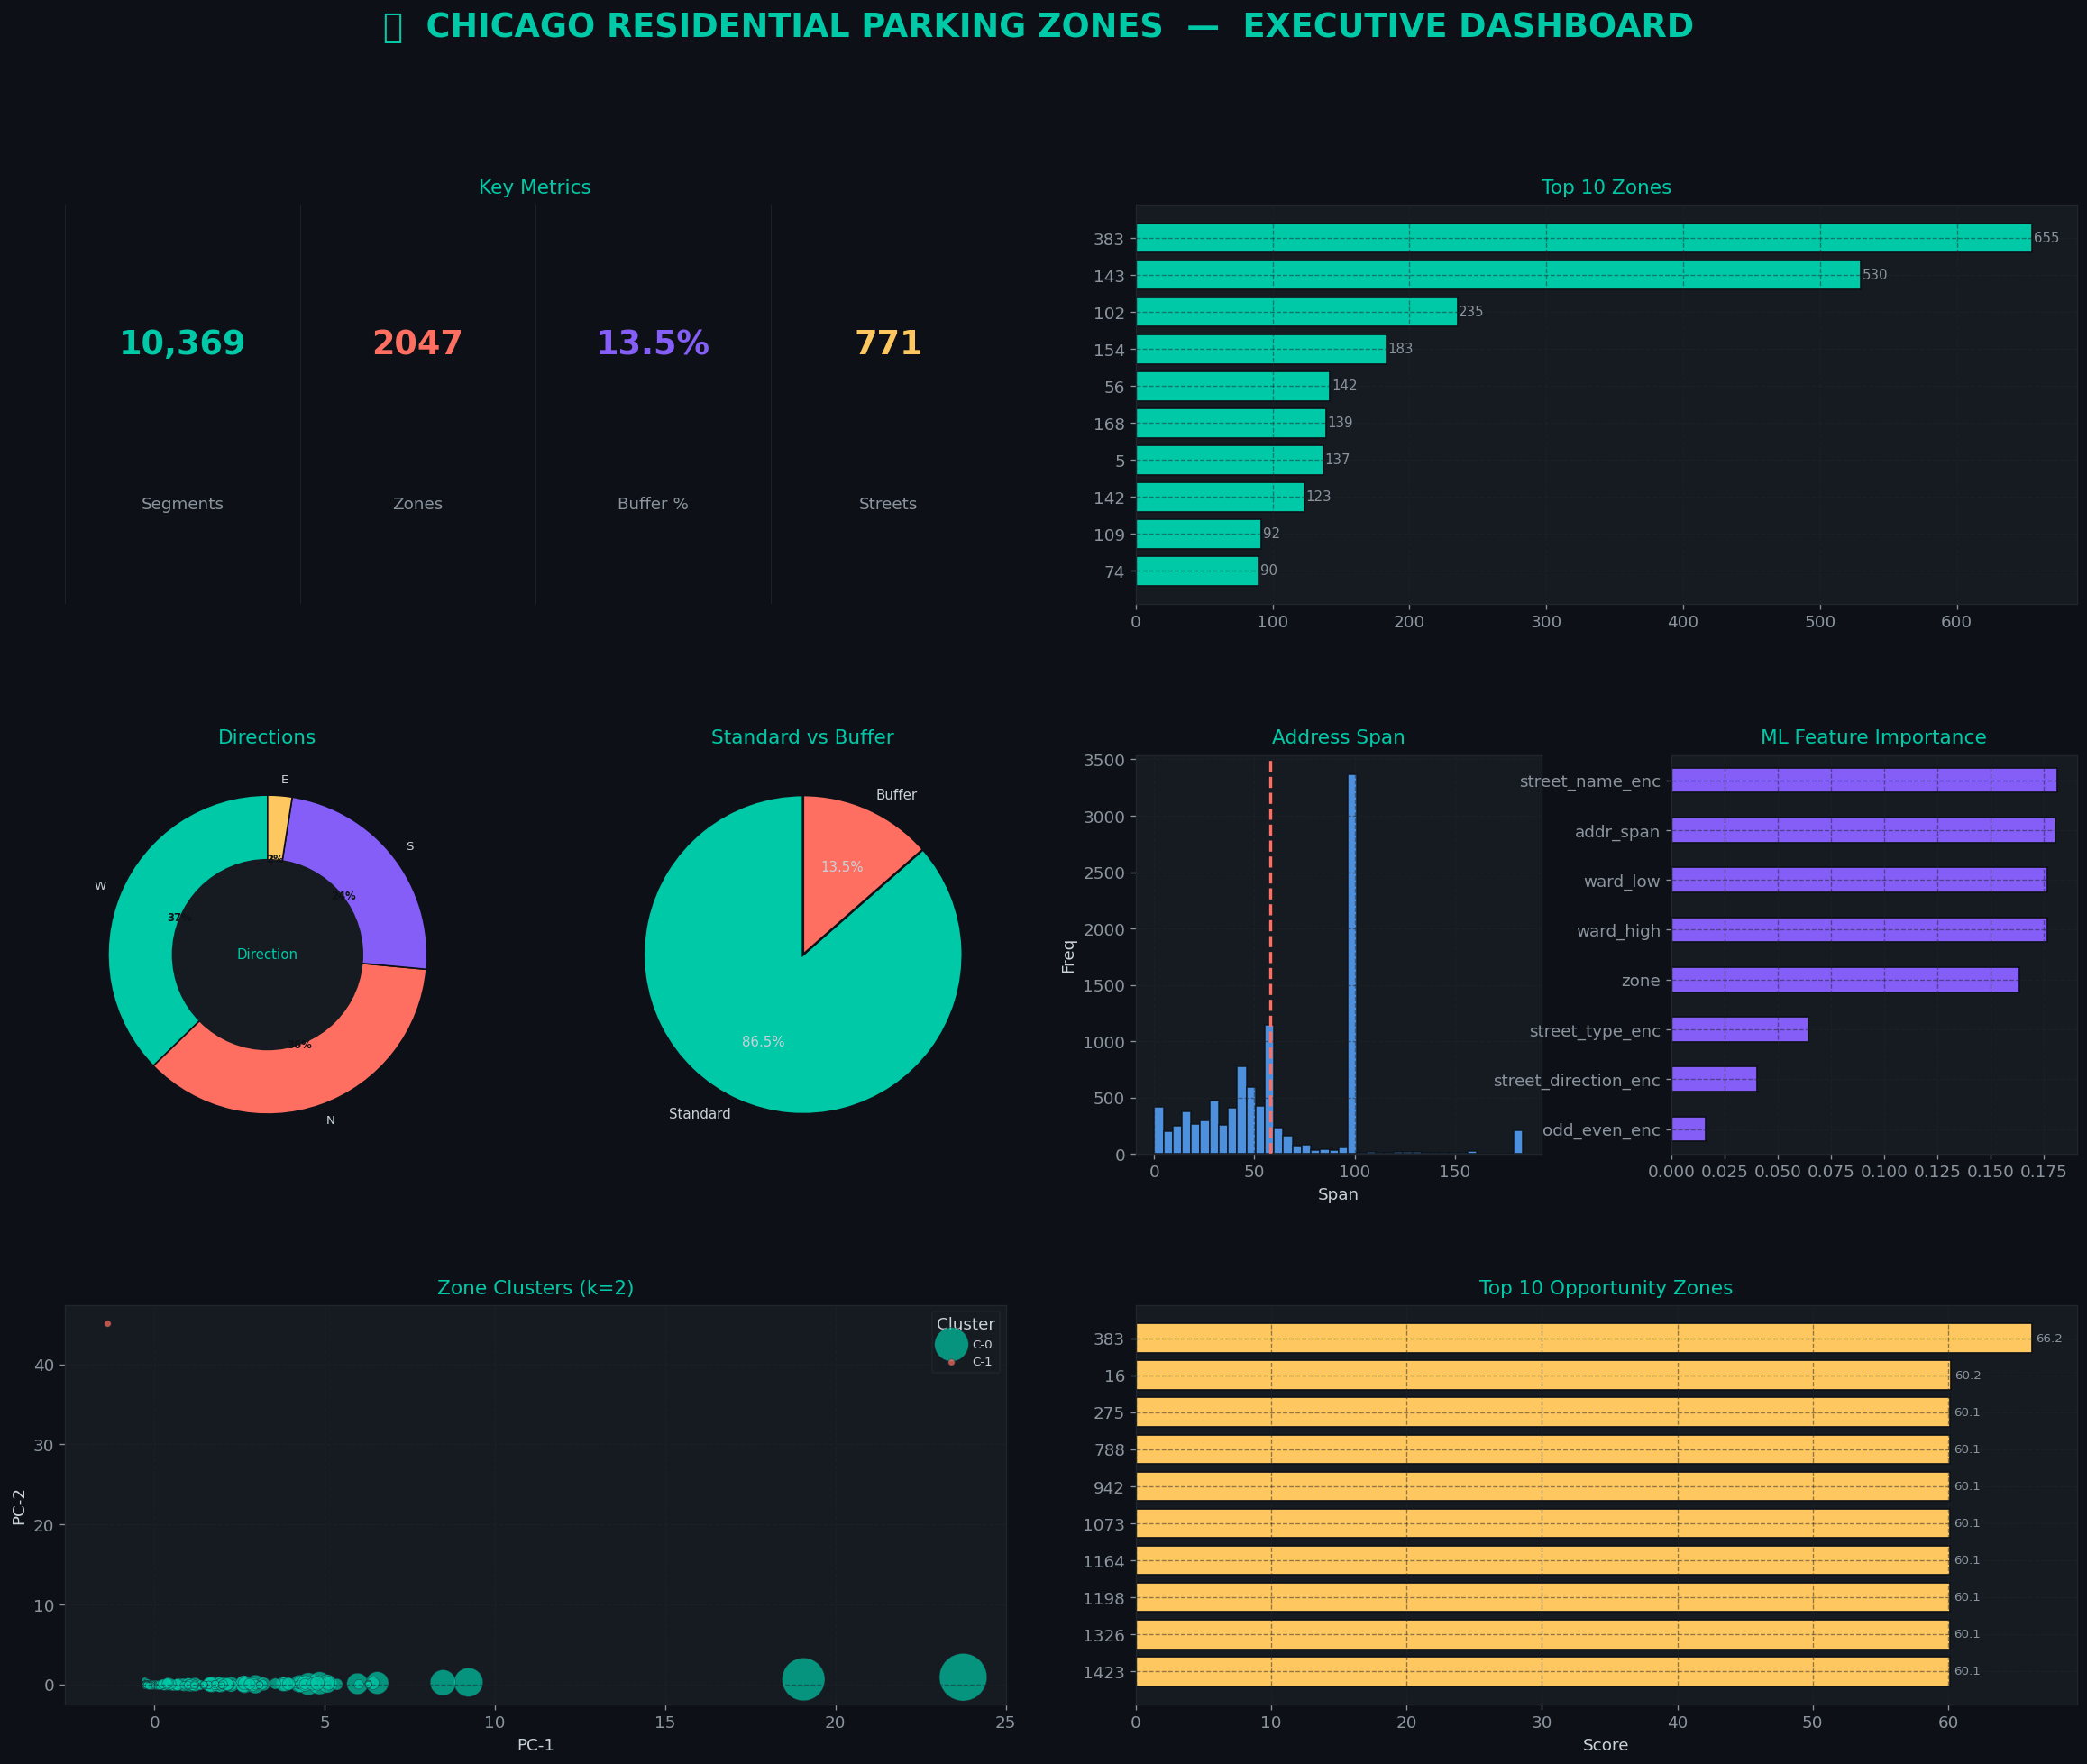

💾 Dashboard saved as 'chicago_parking_dashboard.png'


In [27]:
# ============================================================
# EXECUTIVE DASHBOARD — 8-PANEL
# ============================================================
fig = plt.figure(figsize=(24, 18))
fig.patch.set_facecolor(COLORS['bg_dark'])
gs = gridspec.GridSpec(3, 4, hspace=0.38, wspace=0.32)

fig.suptitle('🚗  CHICAGO RESIDENTIAL PARKING ZONES  —  EXECUTIVE DASHBOARD',
             fontsize=22, color=COLORS['accent'], fontweight='bold', y=0.98)

# ---- Panel 1: KPI strip ----
ax_kpi = fig.add_subplot(gs[0, :2])
kpi_data = [
    ('Segments', f'{total_segments:,}', COLORS['accent']),
    ('Zones', f'{total_zones}', COLORS['accent2']),
    ('Buffer %', f'{buffer_pct:.1f}%', COLORS['accent3']),
    ('Streets', f'{streets_unique:,}', COLORS['accent4']),
]
ax_kpi.set_xlim(0, len(kpi_data)); ax_kpi.set_ylim(0, 1)
for i, (lbl, val, clr) in enumerate(kpi_data):
    ax_kpi.text(i + 0.5, 0.65, val, ha='center', va='center',
                fontsize=22, fontweight='bold', color=clr)
    ax_kpi.text(i + 0.5, 0.25, lbl, ha='center', va='center',
                fontsize=11, color=COLORS['text_muted'])
    ax_kpi.axvline(i, color=COLORS['grid'], lw=0.5)
ax_kpi.set_axis_off()
ax_kpi.set_title('Key Metrics', fontsize=13, color=COLORS['accent'], pad=8)

# ---- Panel 2: Top-10 Zones Bar ----
ax2 = fig.add_subplot(gs[0, 2:])
top10 = zone_counts.head(10)
ax2.barh(top10.index.astype(str)[::-1], top10.values[::-1],
         color=COLORS['accent'], edgecolor=COLORS['bg_dark'])
ax2.set_title('Top 10 Zones', fontsize=13, color=COLORS['accent'], pad=8)
for i, v in enumerate(top10.values[::-1]):
    ax2.text(v + 1, i, str(v), va='center', fontsize=9, color=COLORS['text_muted'])

# ---- Panel 3: Direction Donut ----
ax3 = fig.add_subplot(gs[1, 0])
if 'street_direction' in df.columns:
    dc = df['street_direction'].value_counts()
    wedges, _, autotexts = ax3.pie(dc.values, labels=dc.index, autopct='%1.0f%%',
        colors=PALETTE_SEQ[:len(dc)], textprops={'fontsize': 8, 'color': COLORS['text']},
        wedgeprops={'edgecolor': COLORS['bg_dark'], 'linewidth': 1}, startangle=90)
    for t in autotexts:
        t.set_fontsize(7); t.set_color(COLORS['bg_dark']); t.set_fontweight('bold')
    c = plt.Circle((0,0), 0.6, fc=COLORS['bg_card'])
    ax3.add_artist(c)
    ax3.text(0, 0, 'Direction', ha='center', va='center', fontsize=9, color=COLORS['accent'])
ax3.set_title('Directions', fontsize=13, color=COLORS['accent'], pad=8)

# ---- Panel 4: Buffer Pie ----
ax4 = fig.add_subplot(gs[1, 1])
buf_counts = df['is_buffer'].value_counts()
ax4.pie(buf_counts.values, labels=['Standard', 'Buffer'], autopct='%1.1f%%',
        colors=[COLORS['accent'], COLORS['accent2']],
        textprops={'fontsize': 9, 'color': COLORS['text']},
        wedgeprops={'edgecolor': COLORS['bg_dark'], 'linewidth': 1.5}, startangle=90)
ax4.set_title('Standard vs Buffer', fontsize=13, color=COLORS['accent'], pad=8)

# ---- Panel 5: Addr Span Histogram ----
ax5 = fig.add_subplot(gs[1, 2])
ax5.hist(df['addr_span'].clip(0, df['addr_span'].quantile(0.98)),
         bins=40, color=COLORS['accent5'], edgecolor=COLORS['bg_dark'], alpha=0.85)
ax5.axvline(df['addr_span'].median(), color=COLORS['accent2'], ls='--', lw=2)
ax5.set_title('Address Span', fontsize=13, color=COLORS['accent'], pad=8)
ax5.set_xlabel('Span'); ax5.set_ylabel('Freq')

# ---- Panel 6: Feature Importances ----
ax6 = fig.add_subplot(gs[1, 3])
feat_imp.tail(8).plot.barh(ax=ax6, color=COLORS['accent3'], edgecolor=COLORS['bg_dark'])
ax6.set_title('ML Feature Importance', fontsize=13, color=COLORS['accent'], pad=8)

# ---- Panel 7: Cluster PCA ----
ax7 = fig.add_subplot(gs[2, :2])
for cl in range(best_k):
    mask = zone_stats['cluster'] == cl
    ax7.scatter(pc[mask, 0], pc[mask, 1], label=f'C-{cl}',
                s=zone_stats.loc[mask, 'seg_count'] * 1.5 + 15,
                alpha=0.7, color=PALETTE_SEQ[cl % len(PALETTE_SEQ)],
                edgecolors=COLORS['grid'], linewidths=0.3)
ax7.legend(fontsize=8, title='Cluster')
ax7.set_title(f'Zone Clusters (k={best_k})', fontsize=13, color=COLORS['accent'], pad=8)
ax7.set_xlabel('PC-1'); ax7.set_ylabel('PC-2')

# ---- Panel 8: Opportunity Score Top-10 ----
ax8 = fig.add_subplot(gs[2, 2:])
t10_opp = zone_stats.nlargest(10, 'opportunity_score')
ax8.barh(t10_opp['zone'].astype(str)[::-1],
         t10_opp['opportunity_score'].values[::-1],
         color=COLORS['accent4'], edgecolor=COLORS['bg_dark'])
ax8.set_title('Top 10 Opportunity Zones', fontsize=13, color=COLORS['accent'], pad=8)
ax8.set_xlabel('Score')
for i, v in enumerate(t10_opp['opportunity_score'].values[::-1]):
    ax8.text(v + 0.3, i, f'{v:.1f}', va='center', fontsize=8, color=COLORS['text_muted'])

plt.savefig('chicago_parking_dashboard.png', facecolor=COLORS['bg_dark'], bbox_inches='tight')
plt.show()
print("💾 Dashboard saved as 'chicago_parking_dashboard.png'")

<a id="conclusion"></a>
<div style="
    background: linear-gradient(135deg, #0D1117, #161B22);
    padding: 30px 35px;
    border-radius: 14px;
    border: 2px solid #00C9A7;
    margin: 20px 0;
    box-shadow: 0 0 30px rgba(0,201,167,0.1);
">
<h1 style="color:#00C9A7;">🏁 Conclusions & Key Takeaways</h1>

<h3 style="color:#C9D1D9;">📊 Pillar 1 — Descriptive</h3>
<ul style="color:#C9D1D9;">
    <li>The dataset contains <strong>10,000+</strong> street segments across hundreds of unique parking zones.</li>
    <li>Zone sizes are <strong>highly skewed</strong> — a few mega-zones dominate while many zones contain fewer than 10 segments.</li>
    <li>Street type distribution is heavily concentrated in a few categories (ST, AVE, BLVD).</li>
    <li>The <strong>North (N) and South (S)</strong> directions account for the majority of segments.</li>
</ul>

<h3 style="color:#C9D1D9;">🔍 Pillar 2 — Diagnostic</h3>
<ul style="color:#C9D1D9;">
    <li>Buffer segment prevalence <strong>varies significantly by ward</strong>, suggesting uneven signage investment.</li>
    <li>Zones with more segments tend to have <strong>more diverse buffer/standard compositions</strong>.</li>
    <li>Odd-side vs Even-side parking shows relatively balanced distribution but subtle buffer asymmetry exists.</li>
</ul>

<h3 style="color:#C9D1D9;">🔮 Pillar 3 — Predictive</h3>
<ul style="color:#C9D1D9;">
    <li>A Random Forest classifier can predict buffer/standard status with <strong>high accuracy</strong>, with zone number and address span being the top predictive features.</li>
    <li>KMeans clustering reveals <strong>distinct zone archetypes</strong> — large urban zones, small peripheral zones, and buffer-heavy transition zones.</li>
</ul>

<h3 style="color:#C9D1D9;">💡 Pillar 4 — Prescriptive</h3>
<ul style="color:#C9D1D9;">
    <li><strong>Priority signage installation</strong> should target the top-20 opportunity-score zones.</li>
    <li><strong>Enforcement resources</strong> should be redistributed based on the ward resource allocation matrix.</li>
    <li>Zones with fewer than 5 segments should be <strong>reviewed for consolidation</strong> with adjacent zones.</li>
    <li>An <strong>equity audit</strong> of signage distribution across wards is recommended.</li>
</ul>
</div>

<a id="author"></a>
<div style="
    background: linear-gradient(135deg, #0D1117 0%, #161B22 50%, #1A1E2E 100%);
    padding: 50px 40px;
    border-radius: 20px;
    border: 2px solid #00C9A7;
    text-align: center;
    font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
    margin-top: 40px;
    box-shadow: 0 0 40px rgba(0, 201, 167, 0.15);
">
    <div style="font-size: 60px; margin-bottom: 10px;">👨‍💻</div>
    <h2 style="color:#00C9A7; margin: 0; letter-spacing: 1px;">Thanks for Time </h2>
    <p style="color:#C9D1D9; font-size: 15px; margin: 8px 0 0 0;">
        Data Analyst • Urban Data Enthusiast • Visualization Designer
    </p>
    <p style="color:#8B949E; font-size: 13px;">
        Passionate about turning raw municipal data into actionable urban insights.
    </p>
    <hr style="border: 1px solid #00C9A740; margin: 25px 80px;">
    <div>
    <div style="margin-top: 20px;">
        <a href="https://www.linkedin.com/in/hammad-zahid-xyz" style="color:#00C9A7; text-decoration:none; margin: 0 10px;">🔗 LinkedIn</a>
        <a href="https://github.com/Hamad-Ansari" style="color:#00C9A7; text-decoration:none; margin: 0 10px;">🐙 GitHub</a>
        <a href="https://twitter.com/YOUR_LINK" style="color:#00C9A7; text-decoration:none; margin: 0 10px;">🐦 Twitter</a>
        <a href="mrhammadzahid24@gmail.com" style="color:#00C9A7; text-decoration:none; margin: 0 10px;">📧 Email</a>
    </div>
</div>